# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Business Context
- Key Factors influences dealership which make Car More or Less expensive eg: Market Demand
- Consumer values in used Cars.

### Business Problem Statement

#### Consumer Vaules in Used Cars
- Car Brand (Luxury vs General)
- Car Type (Hybrid, Electric, Fuel)
- Car Year Make, Odometer
- Car Efficiency & Features (Engines, Premium (Leather Seat, Sunroof, colors))
- Car History (No acciedent report, service , tire)
- Car Technology Features (info and entertianment)
- Car Body/Style/Capacity (SUV, Sedan, Trucks, 5 seater, 7 Seater..)
- Car Price

#### What makes Car More or Less Expensive
- Market Factors
-- Demand & Popularity
-- Availability & Supply Chain
-- Seasonal Trends
-- Competitor pricing
- Consumer Values understanding
-- Car Brand , Type , Year & Mileage
-- Car History
-- Car Body/Style/Capacity
-- Car Price

### Project Goal
- What Drives the Price of Car

### Logical Data

![Business Understading](./images/usedCarContext.png)

# Contents

## Load Data and describe statstics

## Exploratory Data Analysis (EDA)
1. Check for zero Values in numerical features
2. Check for zero values in categoraial feature
3. Check for duplicates
4. Check for unique
5. Check for outliers
6. Check for missing data

## Data Preparation
1. Drop, Fill & Convert
2. Log Transformation for outlier
3. Applying PCA for removing outliers
4. Distribution of 3 key features (Price, Year, Odometer)
5. Odometer vs. Price by Year, (No Outliers)
6. Data Preparation Summary

## Modeling
1. Simple Linear Regression model (Year vs Price)
2. Calculate Linear Regression RMSE - Year
3. Simple Linear Regression model (Odometer vs Price)
4. Calculate RMSE of Linear Regression - Odometer
5. Simple Linear Regression with PCA No Outliers Dataset
6. Calculate RMSE of Linear Regression - Year with PCA no outliers data
7. Multiple Linear Regression Model
8. Column Transformer and Apply one hot encoding
9. Calculate MSE of Multiple Linear Regression

## Evaluation

1. Evalution Multiple Linear regression
2. Baseline Performance vs Model Performance
3. One-hot encodes categorical variables
4. Sequential Feature Selection (SFS)
5. GridSearchCV Hyperparameter tuning for Ridge and Lasso
6. Evaluate Ridge vs Lasso Regression
7. Coefficients (Ridge vs Lasso)
8. Correlation numerical features
9. Matrix

## Deployment

1. Ridge Regression Actual vs Predicated Price
2. Lasso Regression Actual vs Predicated Price
3. Price Distribution by Year
4. Calculate average (mean) price for each year - Actual and Predicted Prices
5. Calculate average (mean) price for each range of odometer - Actual and Predicted Prices
6. Price vs Odometer with Color-coded Condition

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


## Load Data and describe statstics

In [114]:
rawData = pd.read_csv('./data/vehicles.csv')

In [115]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [116]:
rawData.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [117]:
rawData.tail()

id   region  price    year manufacturer  \
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy

In [118]:
rawData.shape

(426880, 18)

In [119]:
rawData.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

## Exploratory Data Analysis (EDA)


---


### 1. Check for zero Values in numerical features

In [120]:
rawData.eq(0).sum()

id                  0
region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

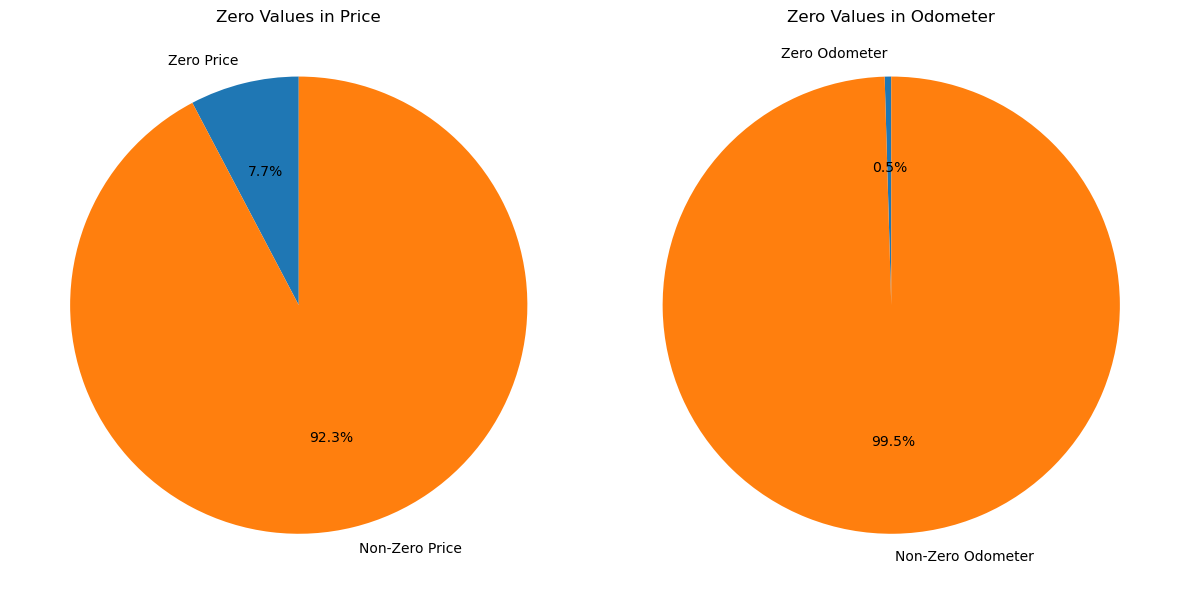

In [121]:
#to find the percentage of zero value of total record
price_zeros = rawData['price'].eq(0).sum()
odometer_zeros = rawData['odometer'].eq(0).sum()


# Total number of records
total_records = len(rawData)

# Calculate percentages
price_zero_percentage = (price_zeros / total_records) * 100
odometer_zero_percentage = (odometer_zeros / total_records) * 100

# Create the pie charts
labels_price = ['Zero Price', 'Non-Zero Price']
sizes_price = [price_zero_percentage, 100 - price_zero_percentage]

labels_odometer = ['Zero Odometer', 'Non-Zero Odometer']
sizes_odometer = [odometer_zero_percentage, 100-odometer_zero_percentage]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure and two subplots

# Price Pie Chart
axes[0].pie(sizes_price, labels=labels_price, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Zero Values in Price')

# Odometer Pie Chart
axes[1].pie(sizes_odometer, labels=labels_odometer, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Zero Values in Odometer')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('./images/zero_values_pie_charts.png')
plt.show()



 **Data Observation1**: 
 - Price has got around 32895 zero values of 6.6% of total data, Possible that these records dummy/unused and not interested for dealership, will drop $0 price records.

**Data Observation2**:
- odometer has got around 1965 zero values of 0.5 % of total data 426879, though this smallest values of 0 will drop thise record.



### 2. Check for Zero values in Categoraial features

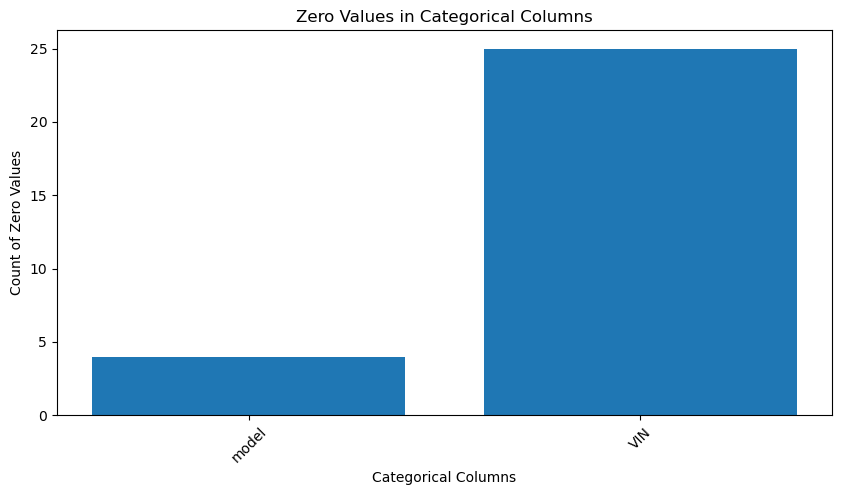

In [122]:
# Selecting categorical columns
categorical_columns = rawData.select_dtypes(include=['object']).columns

# Checking for zero counts in categorical columns
zero_counts = {col: (rawData[col] == '0').sum() for col in categorical_columns}

# Filtering out columns that have at least one zero entry
zero_counts = {col: count for col, count in zero_counts.items() if count > 0}

# Plotting the zero counts
if zero_counts:
    plt.figure(figsize=(10, 5))
    plt.bar(zero_counts.keys(), zero_counts.values())
    plt.xlabel('Categorical Columns')
    plt.ylabel('Count of Zero Values')
    plt.title('Zero Values in Categorical Columns')
    plt.xticks(rotation=45)
    plt.savefig('./images/zero_values_categorical.png')
    plt.show()

else:
    print("No zero values found in categorical columns.")

**Data Observation3**:
- looks there are few records in categorial field with VIN=0 and Model = 0 which records can be removed as with VIN and model number other data will be invalid also this percentage is less.

### 3. Check for Duplicate records

In [123]:
duplicate_rows = rawData[rawData.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows


Number of duplicate rows: 0


Empty DataFrame
Columns: [id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state]
Index: []

In [124]:
# Identify VINs with inconsistencies in critical attributes
count = rawData['VIN'].value_counts()

duplicateRec = count[count > 1]

duplicate_vin_analysis = rawData[rawData['VIN'].isin(duplicateRec.index)].groupby('VIN')[
    ['year', 'odometer', 'title_status', 'transmission', 'drive', 'fuel', 'model']
].nunique()

duplicate_vin_analysis

year  odometer  title_status  transmission  drive  fuel  \
VIN                                                                          
0                     8         7             2             3      2     2   
0000000RN47028886     1         1             1             1      0     1   
0000000T05H107426     1         1             1             1      0     1   
0000000V264204442     1         1             1             1      1     1   
0000004Y83Z146570     1         1             1             1      0     1   
...                 ...       ...           ...           ...    ...   ...   
ZN661XUL7HX239289     1         1             0             1      1     1   
ZN661XUS7HX248033     1         1             1             1      0     1   
ZN661YUA4LX344692     1         1             1             1      0     1   
ZN661YUS0HX263351     1         1             1             1      1     1   
ZPBUA1ZL1KLA02237     1         1             1             1      1     1   

                   model  
VIN                       
0                      6  
0000000RN47028886      1  
0000000T05H107426      1  
0000000V264204442      1  
0000004Y83Z146570      1  
...                  ...  
ZN661XUL7HX239289      1  
ZN661XUS7HX248033      1  
ZN661YUA4LX344692      1  
ZN661YUS0HX263351      1  
ZPBUA1ZL1KLA02237      1  

[40280 rows x 7 columns]

In [125]:
rawData.query("VIN == '1FTER1EH1LLA36301'")

id                    region  price    year manufacturer  \
53      7314584322                    auburn  27990  2020.0         ford   
577     7313343182                birmingham  27990  2020.0         ford   
1896    7313775947                    dothan  27990  2020.0         ford   
2179    7313871035  florence / muscle shoals  27990  2020.0         ford   
2339    7314657320          gadsden-anniston  27990  2020.0         ford   
...            ...                       ...    ...     ...          ...   
419280  7313896544                 la crosse  27990  2020.0         ford   
420504  7312780750                   madison  27990  2020.0         ford   
423571  7312727556                 milwaukee  27990  2020.0         ford   
425340  7313313987                 sheboygan  27990  2020.0         ford   
425759  7313268644                    wausau  27990  2020.0         ford   

                            model condition cylinders fuel  odometer  \
53      ranger supercab xl pickup      good       NaN  gas   10688.0   
577     ranger supercab xl pickup      good       NaN  gas   10688.0   
1896    ranger supercab xl pickup      good       NaN  gas   10688.0   
2179    ranger supercab xl pickup      good       NaN  gas   10688.0   
2339    ranger supercab xl pickup      good       NaN  gas   10688.0   
...                           ...       ...       ...  ...       ...   
419280  ranger supercab xl pickup      good       NaN  gas   10688.0   
420504  ranger supercab xl pickup      good       NaN  gas   10688.0   
423571  ranger supercab xl pickup      good       NaN  gas   10688.0   
425340  ranger supercab xl pickup      good       NaN  gas   10688.0   
425759  ranger supercab xl pickup      good       NaN  gas   10688.0   

       title_status transmission                VIN drive size    type  \
53            clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
577           clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
1896          clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
2179          clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
2339          clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
...             ...          ...                ...   ...  ...     ...   
419280        clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
420504        clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
423571        clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
425340        clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   
425759        clean        other  1FTER1EH1LLA36301   NaN  NaN  pickup   

       paint_color state  
53           white    al  
577          white    al  
1896         white    al  
2179         white    al  
2339         white    al  
...            ...   ...  
419280       white    wi  
420504       white    wi  
423571       white    wi  
425340       white    wi  
425759       white    wi  

[231 rows x 18 columns]

In [126]:
rawData.query("VIN == '1GCHTCE37G1186784'")

id                    region  price    year manufacturer  \
35      7316257769                    auburn  29990  2016.0    chevrolet   
251     7316160104                birmingham  29990  2016.0    chevrolet   
1855    7315245325                    dothan  29990  2016.0    chevrolet   
2166    7315385350  florence / muscle shoals  29990  2016.0    chevrolet   
2314    7316244323          gadsden-anniston  29990  2016.0    chevrolet   
...            ...                       ...    ...     ...          ...   
417059  7316774890                 green bay  29990  2016.0    chevrolet   
419188  7315296319                 la crosse  29990  2016.0    chevrolet   
419708  7316781953                   madison  29990  2016.0    chevrolet   
422238  7316655042                 milwaukee  29990  2016.0    chevrolet   
425661  7315280738                    wausau  29990  2016.0    chevrolet   

                        model condition    cylinders fuel  odometer  \
35      colorado extended cab      good  6 cylinders  gas   17302.0   
251     colorado extended cab      good  6 cylinders  gas   17302.0   
1855    colorado extended cab      good  6 cylinders  gas   17302.0   
2166    colorado extended cab      good  6 cylinders  gas   17302.0   
2314    colorado extended cab      good  6 cylinders  gas   17302.0   
...                       ...       ...          ...  ...       ...   
417059  colorado extended cab      good  6 cylinders  gas   17302.0   
419188  colorado extended cab      good  6 cylinders  gas   17302.0   
419708  colorado extended cab      good  6 cylinders  gas   17302.0   
422238  colorado extended cab      good  6 cylinders  gas   17302.0   
425661  colorado extended cab      good  6 cylinders  gas   17302.0   

       title_status transmission                VIN drive size    type  \
35            clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
251           clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
1855          clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
2166          clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
2314          clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
...             ...          ...                ...   ...  ...     ...   
417059        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
419188        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
419708        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
422238        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   
425661        clean        other  1GCHTCE37G1186784   4wd  NaN  pickup   

       paint_color state  
35             red    al  
251            red    al  
1855           red    al  
2166           red    al  
2314           red    al  
...            ...   ...  
417059         red    wi  
419188         red    wi  
419708         red    wi  
422238         red    wi  
425661         red    wi  

[214 rows x 18 columns]

In [127]:
# Find VINs with variations in any critical attribute
vins_with_issues = duplicate_vin_analysis[
    (duplicate_vin_analysis['year'] > 1) |
    (duplicate_vin_analysis['transmission'] > 1) |
    (duplicate_vin_analysis['drive'] > 1) |
    (duplicate_vin_analysis['fuel'] > 1) |
    (duplicate_vin_analysis['model'] > 1)
].index


# Step 5: Count the total number of records with VIN inconsistencies
total_vin_with_issues = rawData[rawData['VIN'].isin(vins_with_issues)].shape[0]
total_vin_with_issues


13062

In [128]:
df_duplicateVIN = rawData[rawData['VIN'].isin(vins_with_issues)].copy()
df_duplicateVIN.shape

(13062, 18)

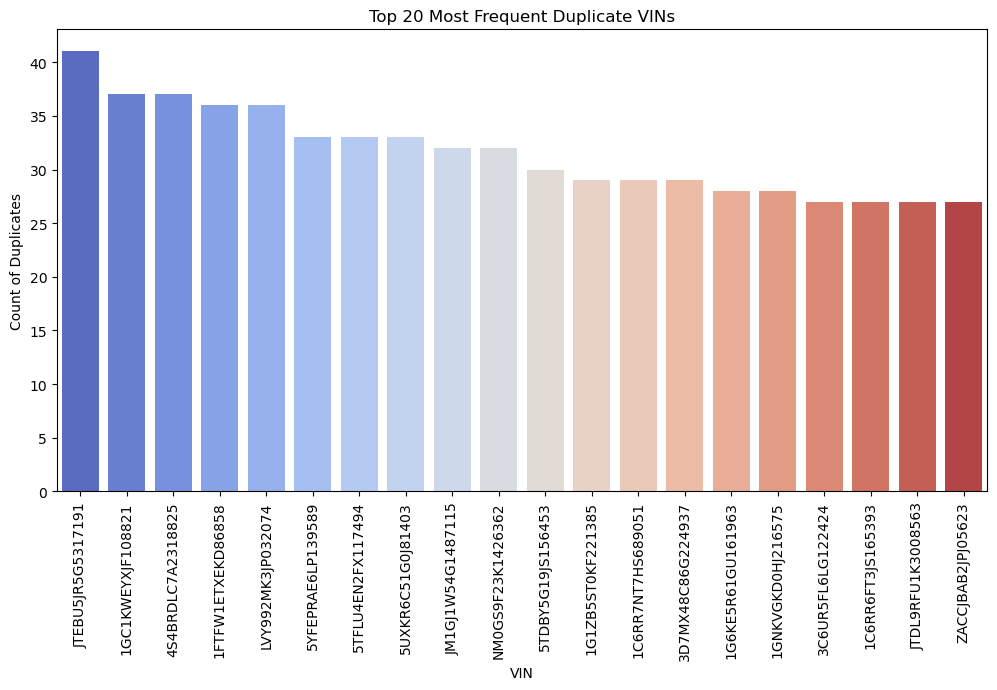

In [139]:
# Count duplicate VIN occurrences
vin_counts = df_duplicateVIN['VIN'].value_counts()

# Get the top 20 duplicated VINs
top_vins = vin_counts[:20]

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_vins.index, y=top_vins.values, hue=top_vins.index, palette="coolwarm", legend=False)

# Formatting
plt.xticks(rotation=90)
plt.xlabel("VIN")
plt.ylabel("Count of Duplicates")
plt.title("Top 20 Most Frequent Duplicate VINs")
plt.savefig('./images/duplicate_vins.png')
plt.show()


**Data Observation4**:

- Noticed that same VIN number is listed multiple times the regions are different few vin as got same odometer value, year.
- The dataset contains 40,280 unique VINs that have duplicate entries. This means that these 40,280 vehicles have been listed multiple times, contributing to the 348,914 duplicate rows identified earlier
- this depends on various other features like year, odometer, title_status, transmission, drive, fuel and model
- so,
-- Data entry errors
-- Multiple listings of the same vehicle with updated details
-- Incorrect merging of datasets
so around 15297 duplicate records exists multiple times.

### 4. Check for Unique Records

In [140]:
rawData.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

**Data Observation5**: 
- id value matches the total count of records, how ever the **VIN value contains duplicates**  as seen above.


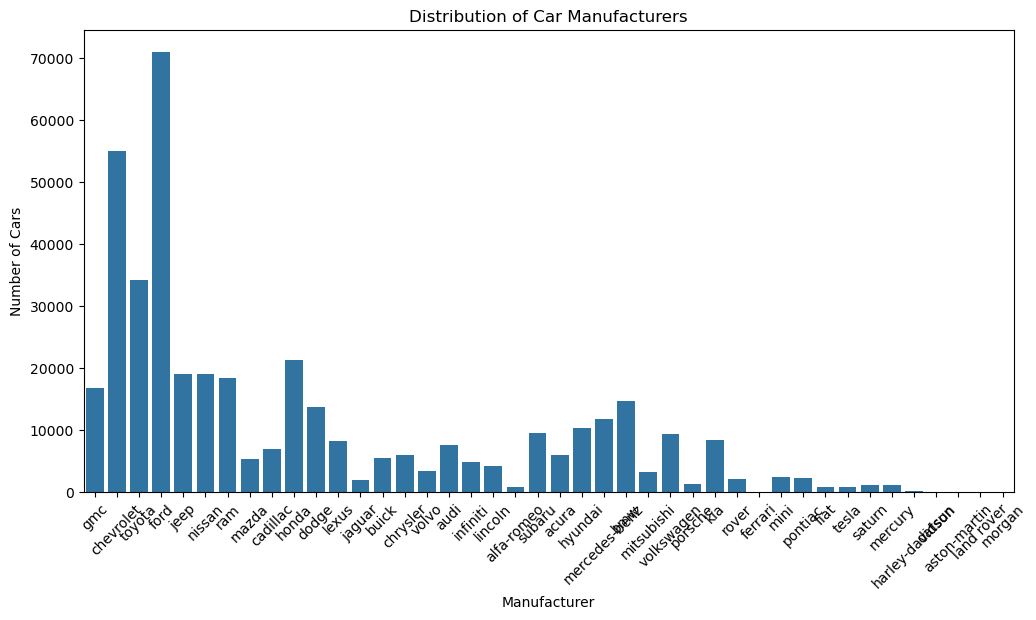

In [141]:
# prompt: plot graph for manufacturer


# Assuming 'manufacturer' is a column in your rawData DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='manufacturer', data=rawData)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.savefig('./images/manufacturer_distribution.png')
plt.show()



**Data Observation5**

**Top Manufacturers Dominate Listings**

- Certain manufacturers such as Ford, Chevrolet, Toyota, Honda, and Nissan have significantly higher listings, indicating their widespread presence and popularity in the used car market.
- This aligns with real-world trends where these brands are among the highest-selling automotive manufacturers.

**American Brands Lead the Market**

- Ford and Chevrolet have the highest number of listings, showing strong demand for American-made vehicles.
- Brands like Dodge, GMC, and Jeep also have substantial representation, reflecting the popularity of trucks and SUVs.

**Japanese Brands are Strong Contenders**

- Toyota and Honda are among the most listed brands, reflecting their reputation for reliability, fuel efficiency, and resale value.
- Nissan, Subaru, and Mazda also have notable listings, reinforcing the popularity of Japanese cars in the used market.

**European Manufacturers Have Lower Representation**

- Brands like BMW, Mercedes-Benz, and Volkswagen have fewer listings compared to American and Japanese brands.
- This may be due to higher maintenance costs, lower resale demand, or fewer units in circulation.

**Luxury and Specialty Brands Have Minimal Listings**

- High-end manufacturers such as Tesla, Porsche, and Land Rover have relatively fewer listings.
- These brands cater to niche markets, and their high prices might limit their availability in the used car market.

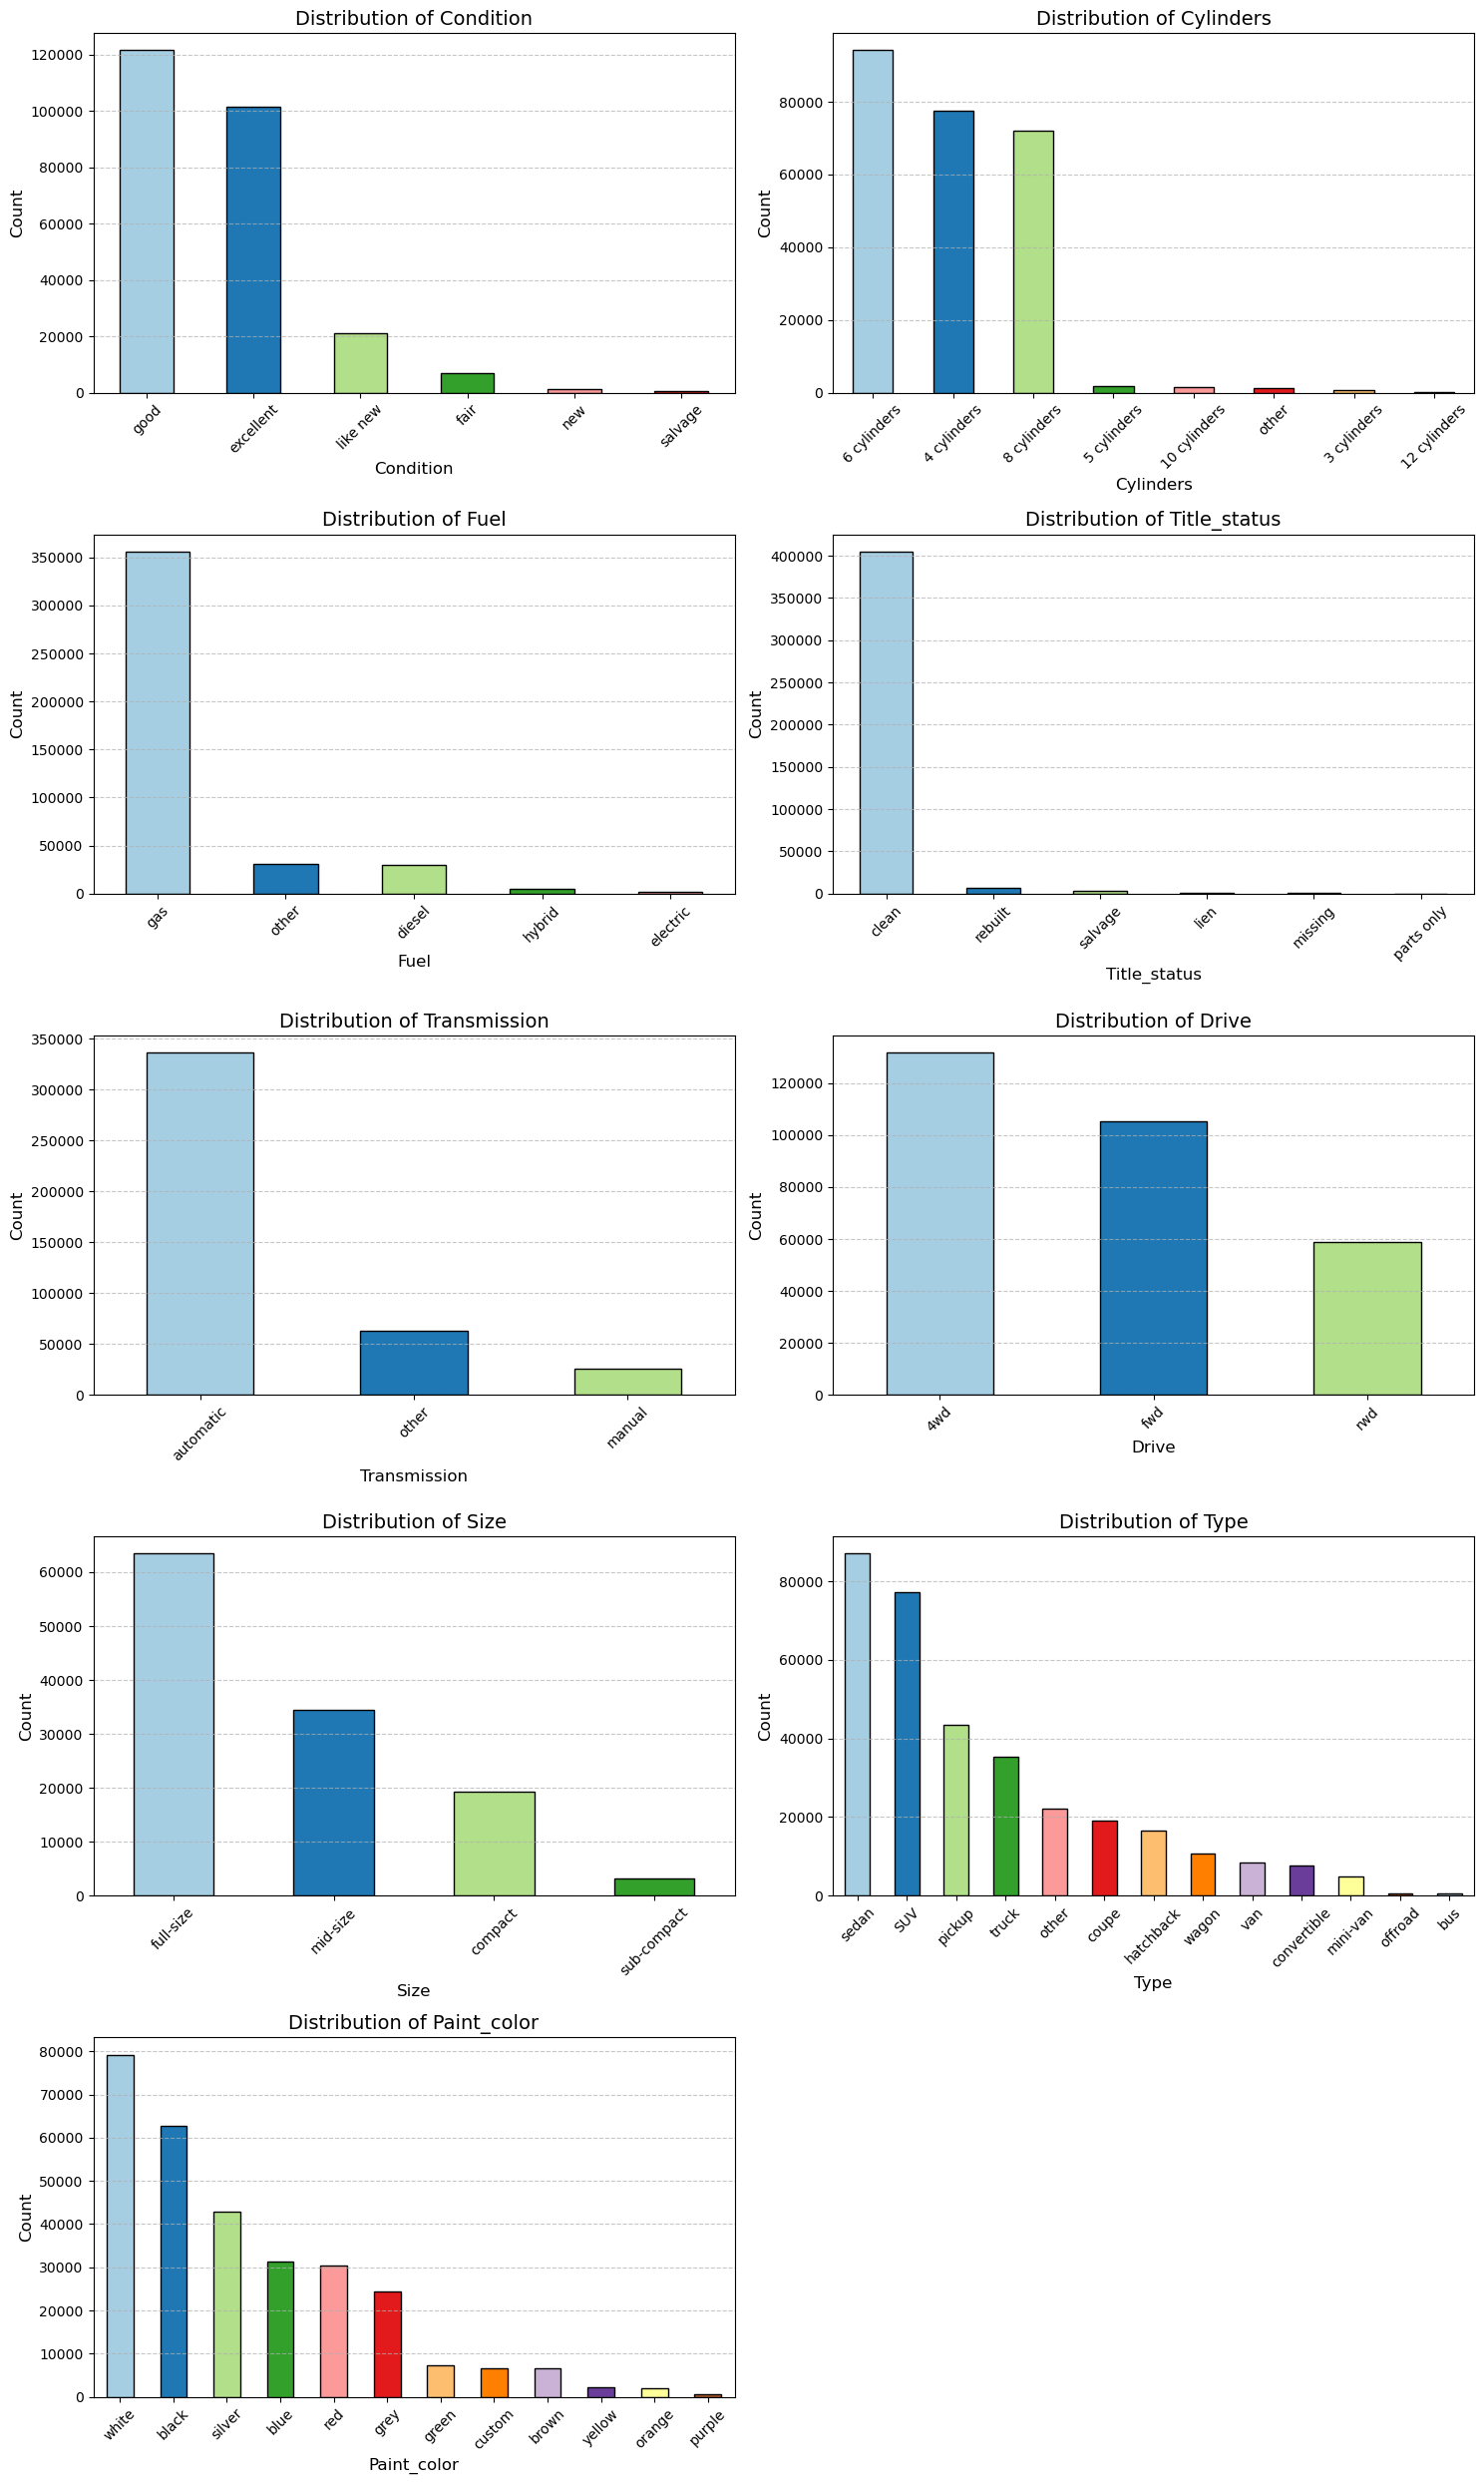

In [142]:
columns_to_plot = ["condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color"]

# Set figure size and layout with 2 graphs per row
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

# Create a bar chart for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    rawData[column].value_counts().plot(kind="bar", color=plt.cm.Paired.colors, edgecolor="black", ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}", fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Hide any empty subplots if needed
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('./images/column_distribution.png')
plt.show()


**Data Observation6**

**Condition Distribution**

- The majority of the vehicles in the dataset are categorized under a few specific conditions, with many missing or unknown values.
- "Like new" and "Excellent" conditions appear to be more frequent, while "Salvage" and "Fair" conditions are less common.

**Cylinders Distribution**

- 4-cylinder and 6-cylinder vehicles dominate the dataset, indicating a preference for fuel-efficient and mid-range performance vehicles.
- 8-cylinder engines, often found in trucks and sports cars, are also present but in smaller numbers.

**Fuel Type Distribution**

- Gasoline is the most common fuel type, suggesting that traditional fuel-powered vehicles still dominate the market.
- Diesel and hybrid vehicles have relatively lower counts, while electric vehicles make up a small fraction of the dataset.

**Title Status**

- The majority of the vehicles have a "Clean" title, meaning they have not been significantly damaged.
- "Salvage" and "Rebuilt" titles are less frequent, indicating that heavily damaged or repaired vehicles are not as common in listings.

**Transmission Type**

- Automatic transmission is the most prevalent, showing a strong consumer preference for convenience over manual shifting.
- Manual transmission vehicles are significantly less common, often associated with sports cars or older models.

**Drive Type**

- Front-wheel drive (FWD) and four-wheel drive (4WD/AWD) vehicles appear to be the most common.
- Rear-wheel drive (RWD) vehicles are less frequent, likely due to their association with sports cars and specific performance vehicles.

**Size Distribution**

- The dataset has a significant number of "Full-size" and "Mid-size" vehicles.
- Compact cars and subcompacts have a lower frequency, possibly due to demand differences in different regions.

**Vehicle Type**

- Trucks, SUVs, and sedans dominate the listings, which aligns with market trends favoring utility and comfort.
- Other types like convertibles and coupes have lower counts, likely reflecting niche market demand.

**Paint Color Distribution**

- The most common colors include black, white, silver, and gray, which are often considered standard and preferred for resale value.
- Uncommon colors like yellow, orange, and purple appear much less frequently, indicating a smaller market for such vehicles.

**Note**
The dataset reveals strong consumer preferences for gasoline-powered, automatic transmission vehicles with clean titles.
The most frequent vehicle categories are trucks, SUVs, and sedans, aligning with real-world sales trends.
Fuel efficiency (4-cylinder engines), neutral paint colors, and mid-size to full-size cars dominate the listings, indicating market demand for practicality and affordability.
There is a relatively low presence of electric, hybrid, and alternative-fuel vehicles, which might indicate slower adoption rates compared to gasoline-powered cars.

### 5. Check for Outliers

In [143]:
rawData.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

**Findings 5**: From describe which fetchs only int & float numerical statstics , ID columns might be not intereseted or relevant to car dealership client, which can be drop off


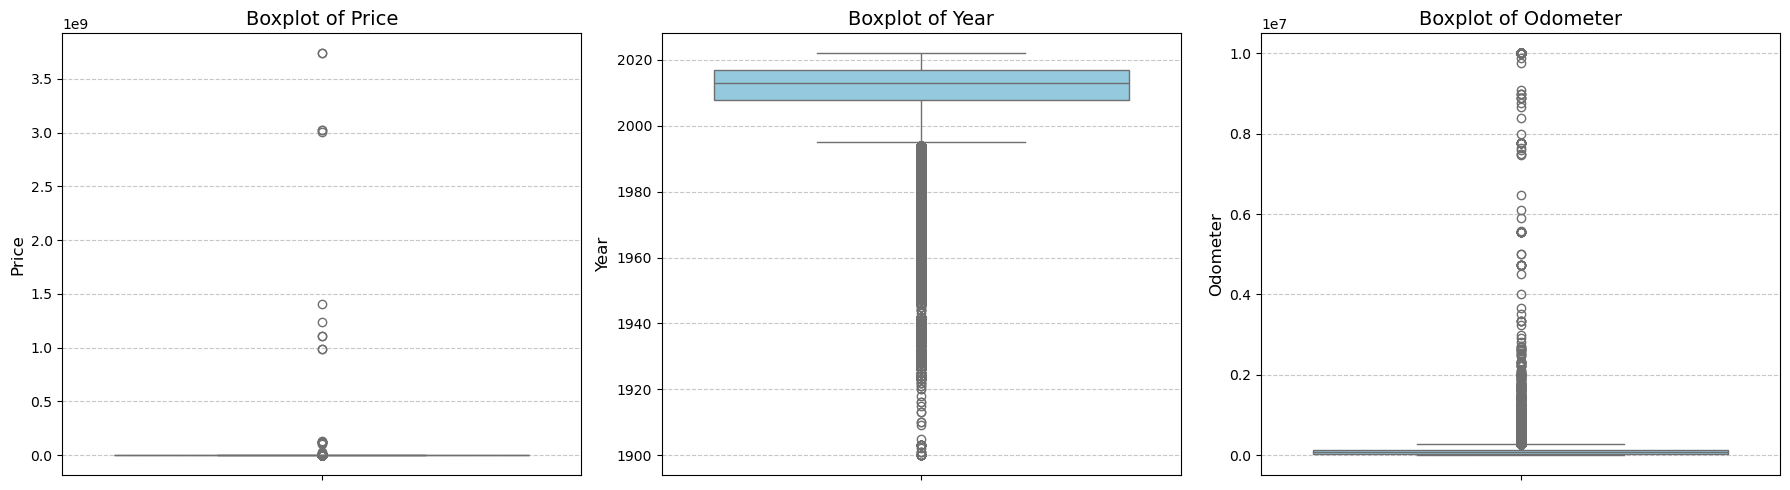

In [183]:
# Select numerical columns for outlier detection
numerical_columns = ["price", "year", "odometer"]

# Set figure size for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create boxplots for detecting outliers side by side
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=rawData[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column.capitalize()}", fontsize=14)
    axes[i].set_ylabel(column.capitalize(), fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('./images/boxplot_outliers.png')
plt.show()


**Data Observation7**

**Price Outliers**

- The price distribution shows a significant number of extreme outliers.
- There are vehicles listed at extremely low prices (potentially unrealistic or promotional listings) and very high prices, possibly luxury or rare models.
- A reasonable price range should be determined to filter out erroneous data points.
- There are some listings where the price is recorded as zero.
- This could indicate:
-- Missing data where sellers did not input the price.
--  Incorrect or erroneous entries, which may need data cleaning

**Year Outliers**

- The year of manufacture appears to have some older vehicles that could be classified as vintage/classic cars.
- There may also be some outliers for future years, which could be incorrect or pre-orders rather than used listings.
- The bulk of the data is likely centered around more recent model years.

**Odometer Outliers**

- The odometer readings display a wide range, with some vehicles having extremely high mileage.
- Some extremely low-mileage cars could be newly listed or incorrect entries.
- High mileage vehicles may indicate well-used or older vehicles, whereas exceptionally low mileage could indicate showroom models or incorrect entries.

### 6. Check for Missing Values (NaN)

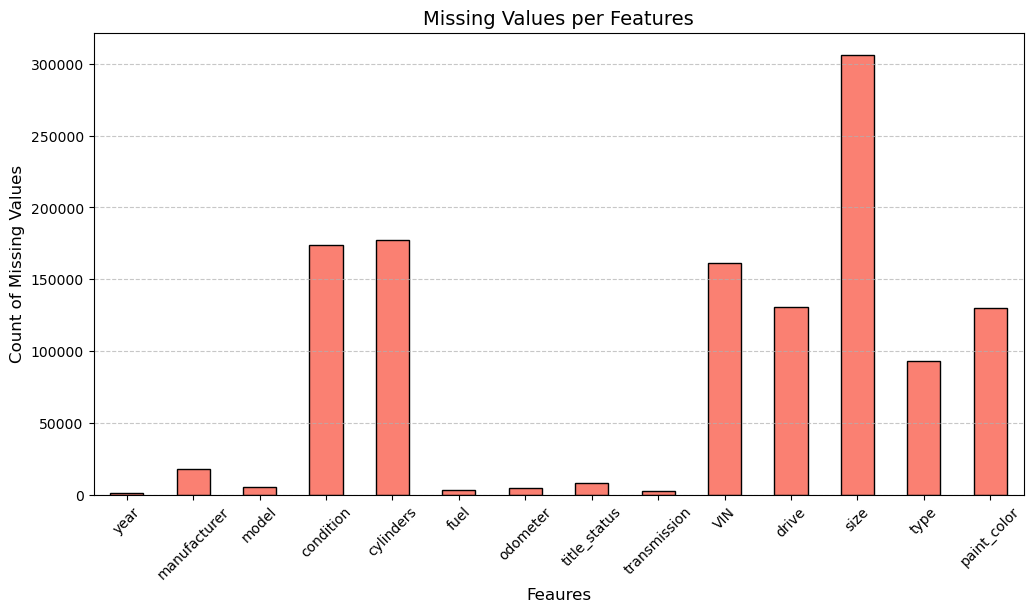

In [146]:
# Filter columns with missing values
missing_values = rawData.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Convert to DataFrame for visualization
missing_values_df = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_values_df["Percentage"] = (missing_values_df["Missing Values"] / len(rawData)) * 100

# Plot missing values as a bar chart
plt.figure(figsize=(12, 6))
missing_values_df["Missing Values"].plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Missing Values per Features", fontsize=14)
plt.xlabel("Feaures", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('./images/missing_values.png')
plt.show()


In [147]:
# Check missing values in the 'size' column
missing_size_count = rawData['VIN'].isnull().sum()
total_entries = len(rawData)
missing_percentage = (missing_size_count / total_entries) * 100

# Print the results
print(f"Total Entries: {total_entries}")
print(f"Missing Values in 'VIN' feature: {missing_size_count}")
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

Total Entries: 426880
Missing Values in 'VIN' feature: 161042
Percentage of Missing Values: 37.73%


In [148]:
# Check missing values in the 'size' column
missing_size_count = rawData['size'].isnull().sum()
total_entries = len(rawData)
missing_percentage = (missing_size_count / total_entries) * 100

# Print the results
print(f"Total Entries: {total_entries}")
print(f"Missing Values in 'size' column: {missing_size_count}")
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

Total Entries: 426880
Missing Values in 'size' column: 306361
Percentage of Missing Values: 71.77%


**Data Observation 8**
- size feature as got around 71% of data missing, may this feature can be dropped.
- VIN feautre got 37% missing may be it is valid to remove the complete row as without VIN details entered would be inaccurate
- Year missing data as low percentage from above graph can be removed for the same

**Recomendation**
- Drop rows if missing values are low (e.g., missing year).
- Fill categorical values with mode (manufacturer, fuel, transmission).
- Fill missing numerical values with median (price, odometer).
- Drop columns with excessive missing data if they are not critical (size)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

## 1. Drop row for duplicate VIN number based on price and odometer

In [149]:
rawData.shape

(426880, 18)

In [150]:
df_usedCar = pd.DataFrame.copy(rawData)
df_usedCar.shape

(426880, 18)

In [151]:
df_usedCar.drop_duplicates(subset=['VIN','price', 'odometer'], inplace=True)
df_usedCar.shape

(211771, 18)

## 2. Drop rows for VIN column = '0'

In [152]:
df_usedCar.VIN.eq('0').sum()

8

In [153]:
df_usedCar.drop(df_usedCar[df_usedCar['VIN'] == '0'].index, inplace=True)
df_usedCar.shape

(211763, 18)

## 3. Drop Columns that are not required (id, VIN & region)

In [154]:
df_usedCar.drop(columns=['id', 'VIN','region'], inplace=True)
df_usedCar.shape

(211763, 15)

## 4. Drop Columns for size contains 71% of missing value

In [155]:
df_usedCar.drop(columns=['size'], inplace=True)
df_usedCar.shape

(211763, 14)

## 5. Drop zero values for Price & Odometer

In [156]:
df_usedCar.price.eq(0).sum()

15504

In [157]:
df_usedCar.odometer.eq(0).sum()

723

In [158]:
df_usedCar.drop(df_usedCar[df_usedCar['price'] == 0].index, inplace=True)
df_usedCar.shape

(196259, 14)

In [159]:
df_usedCar.drop(df_usedCar[df_usedCar['odometer'] == 0].index, inplace=True)
df_usedCar.shape

(195671, 14)

### 6. Fill categorial Null values (NaN) to Not specified

In [160]:
fill_columns = ['condition','cylinders','drive','paint_color','type','title_status','transmission','manufacturer','model','fuel']
for col in fill_columns:
    df_usedCar[col] = df_usedCar[col].fillna('Notspecified')

In [161]:
df_usedCar.isnull().sum()

price              0
year             659
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        1127
title_status       0
transmission       0
drive              0
type               0
paint_color        0
state              0
dtype: int64

### 7. Drop null values for numerical field

In [162]:
df_usedCar.dropna(inplace=True)
df_usedCar.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [163]:
df_usedCar.shape

(193933, 14)

## 8. Convert DataTypes float to int and Object to String

In [164]:
df_usedCar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193933 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         193933 non-null  int64  
 1   year          193933 non-null  float64
 2   manufacturer  193933 non-null  object 
 3   model         193933 non-null  object 
 4   condition     193933 non-null  object 
 5   cylinders     193933 non-null  object 
 6   fuel          193933 non-null  object 
 7   odometer      193933 non-null  float64
 8   title_status  193933 non-null  object 
 9   transmission  193933 non-null  object 
 10  drive         193933 non-null  object 
 11  type          193933 non-null  object 
 12  paint_color   193933 non-null  object 
 13  state         193933 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 22.2+ MB


In [165]:
df_usedCar['year'] = df_usedCar['year'].astype(int)
df_usedCar['odometer'] = df_usedCar['odometer'].astype(int)

In [166]:
df_usedCar = df_usedCar.convert_dtypes()

In [167]:
df_usedCar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193933 entries, 27 to 426838
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         193933 non-null  Int64 
 1   year          193933 non-null  Int32 
 2   manufacturer  193933 non-null  string
 3   model         193933 non-null  string
 4   condition     193933 non-null  string
 5   cylinders     193933 non-null  string
 6   fuel          193933 non-null  string
 7   odometer      193933 non-null  Int32 
 8   title_status  193933 non-null  string
 9   transmission  193933 non-null  string
 10  drive         193933 non-null  string
 11  type          193933 non-null  string
 12  paint_color   193933 non-null  string
 13  state         193933 non-null  string
dtypes: Int32(2), Int64(1), string(11)
memory usage: 21.3 MB


## 9. Log Transformation for outliers

In [168]:
df_usedCar.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [169]:
# Select numerical columns for log transformation
numerical_columns = ['price', 'odometer','year']

# Apply log transformation to reduce the effect of outliers
df_usedCar_log = df_usedCar.copy()
#df_usedCar_log = cars_no_outliers.copy()
for col in numerical_columns:
    df_usedCar_log[col] = np.log1p(df_usedCar[col])  # log1p avoids log(0) issues

In [170]:
df_usedCar_log.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [171]:
df_usedCar_log.shape

(193933, 14)

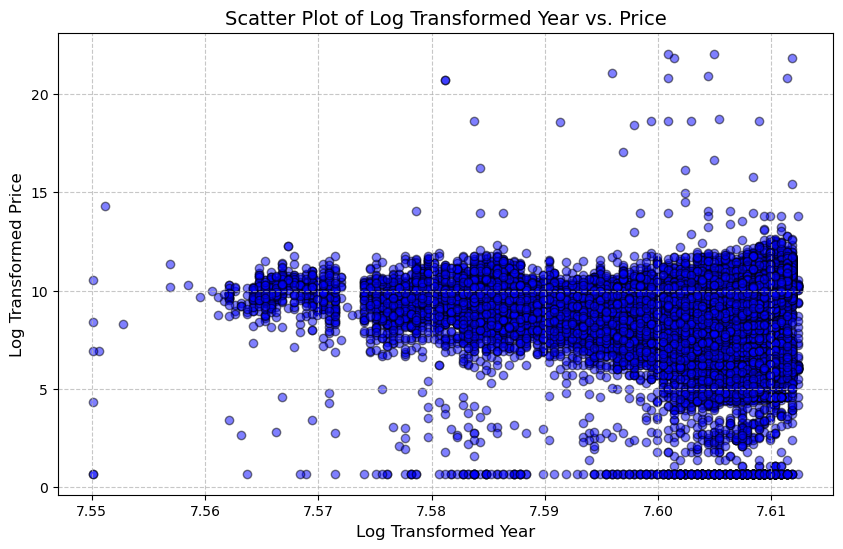

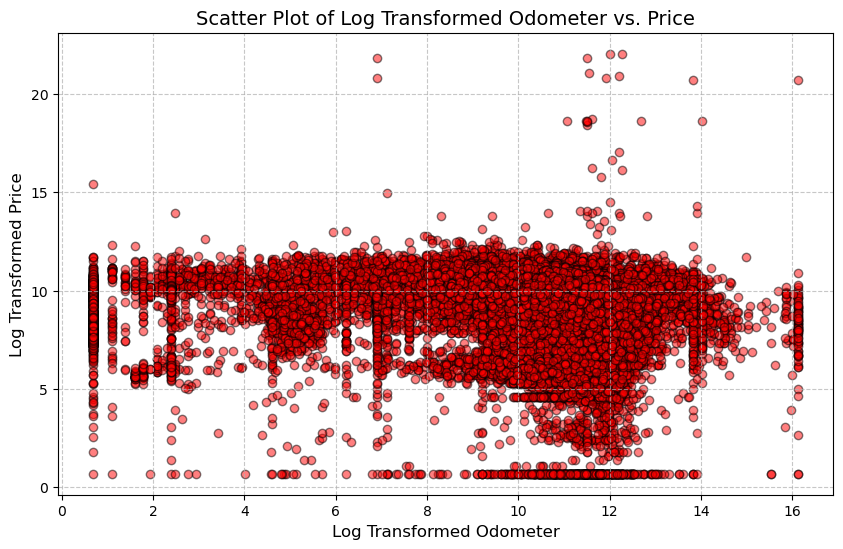

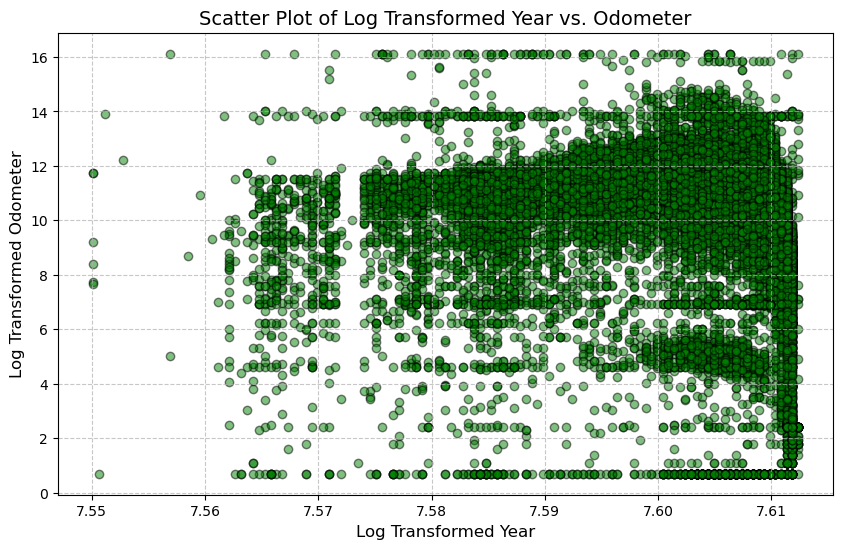

In [172]:
# Scatter plot for log-transformed year vs. log-transformed price
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['year'], df_usedCar_log['price'], alpha=0.5, color='blue', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("Scatter Plot of Log Transformed Year vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('./images/scatter_plot year vs price.png')
plt.show()

# Scatter plot for log-transformed odometer vs. log-transformed price
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['odometer'], df_usedCar_log['price'], alpha=0.5, color='red', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("Scatter Plot of Log Transformed Odometer vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('./images/scatter_plot odometer vs price.png')
plt.show()

# Scatter plot for log-transformed year  vs. log-transformed odometer
plt.figure(figsize=(10, 6))
plt.scatter(df_usedCar_log['year'], df_usedCar_log['odometer'], alpha=0.5, color='green', edgecolors='black')

# Labels and title
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Odometer", fontsize=12)
plt.title("Scatter Plot of Log Transformed Year vs. Odometer", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('./images/scatter_plot year vs odometer.png')
plt.show()


**Observation**

**Year vs. Price**

- Older vehicles (lower years) generally have lower prices.
- Newer vehicles tend to have higher prices.
- Some outliers exist where older cars have high prices (potentially classic or luxury cars).

**Odometer vs. Price**

- Vehicles with higher odometer readings generally have lower prices.
- Some vehicles deviate from this trend, which could indicate luxury vehicles or misreported data.

## Applying PCA for removing outliers

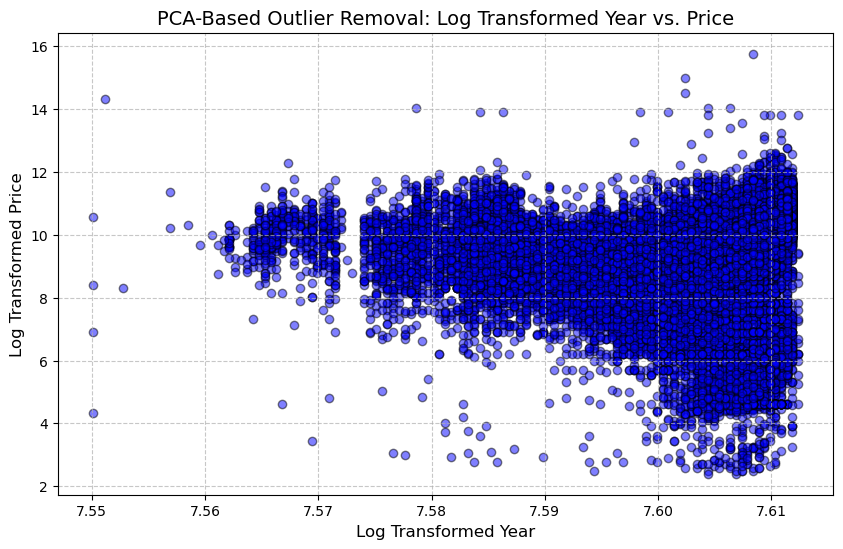

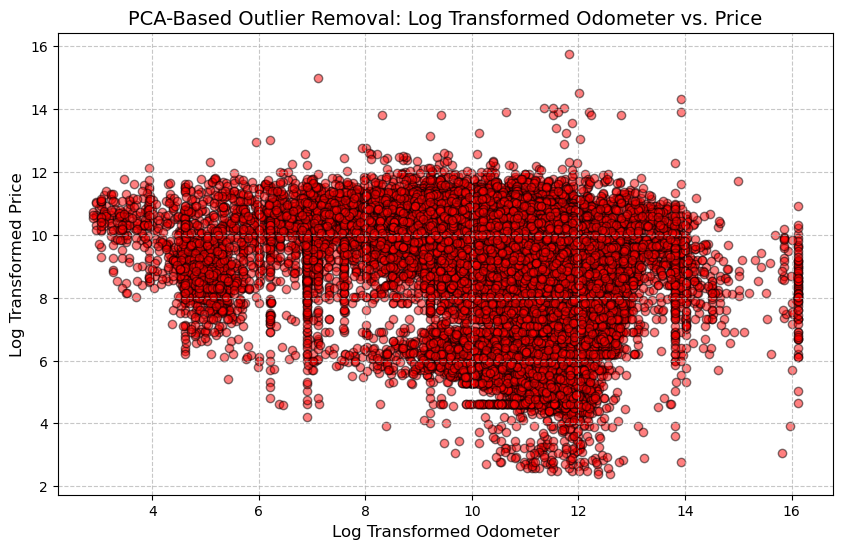

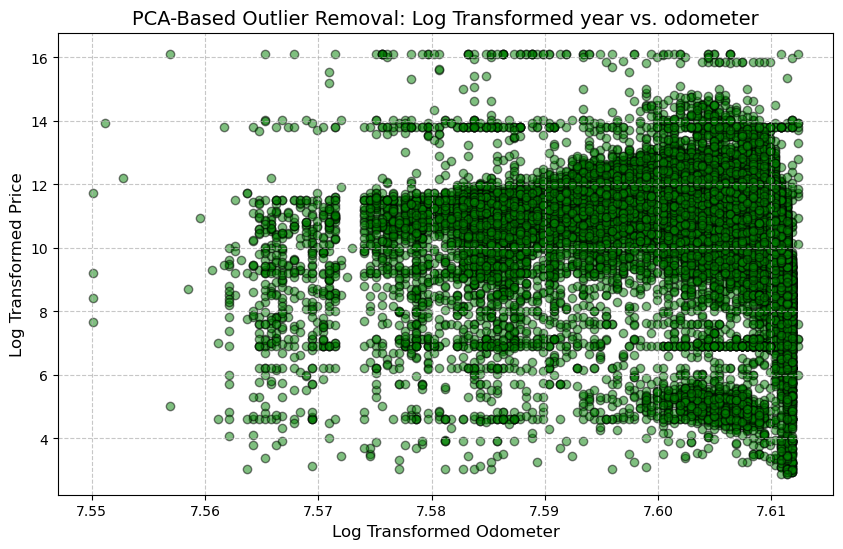

In [173]:
# Apply PCA (keep top 2 components)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_usedCar_log[['price', 'odometer', 'year']])

# Compute Mahalanobis distance for each point
mean = np.mean(pca_features, axis=0)
cov_matrix = np.cov(pca_features.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

df_usedCar_log['Mahalanobis_Distance'] = [mahalanobis(x, mean, inv_cov_matrix) for x in pca_features]

# Define threshold for outliers (e.g., 95th percentile)
threshold = stats.chi2.ppf(0.95, df=2)  # 95% confidence interval
df_no_outliers_pca = df_usedCar_log[df_usedCar_log['Mahalanobis_Distance'] < threshold]

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['year'], df_no_outliers_pca['price'], alpha=0.5, color='blue', edgecolors='black')
plt.xlabel("Log Transformed Year", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed Year vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./images/scatter_plot_pca year vs price.png')
plt.show()

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['odometer'], df_no_outliers_pca['price'], alpha=0.5, color='red', edgecolors='black')
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed Odometer vs. Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./images/scatter_plot_pca odometer vs price.png')
plt.show()

# Scatter plot after PCA outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers_pca['year'], df_no_outliers_pca['odometer'], alpha=0.5, color='green', edgecolors='black')
plt.xlabel("Log Transformed Odometer", fontsize=12)
plt.ylabel("Log Transformed Price", fontsize=12)
plt.title("PCA-Based Outlier Removal: Log Transformed year vs. odometer", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./images/scatter_plot_pca year vs odometer.png')
plt.show()



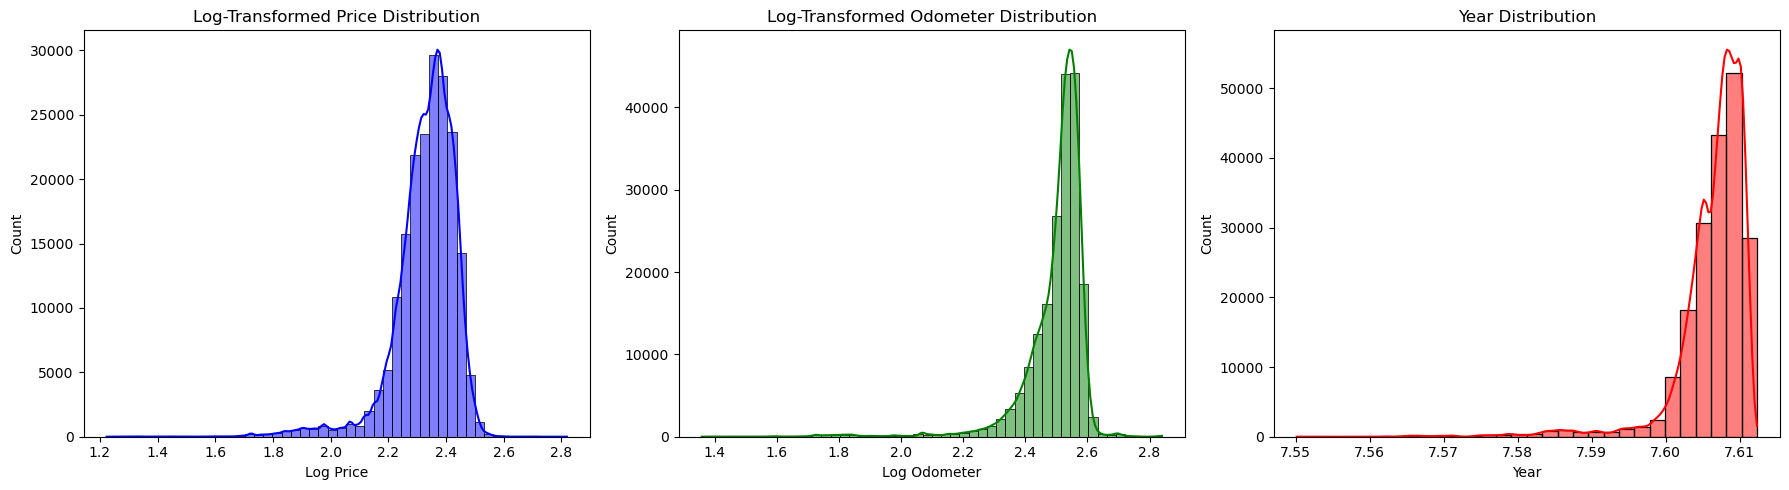

In [175]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Log transformation to improve scale visibility
df_no_outliers_pca.loc[:, 'log_price'] = np.log1p(df_no_outliers_pca['price'])
df_no_outliers_pca.loc[:,'log_odometer'] = np.log1p(df_no_outliers_pca['odometer'])

# Plot Price Distribution (Log Scale)
sns.histplot(df_no_outliers_pca['log_price'], kde=True, ax=axes[0], color='blue', bins=50)
axes[0].set_title('Log-Transformed Price Distribution')
axes[0].set_xlabel('Log Price')

# Plot Odometer Distribution (Log Scale)
sns.histplot(df_no_outliers_pca['log_odometer'], kde=True, ax=axes[1], color='green', bins=50)
axes[1].set_title('Log-Transformed Odometer Distribution')
axes[1].set_xlabel('Log Odometer')

# Plot Year Distribution (Raw Scale)
sns.histplot(df_no_outliers_pca['year'], kde=True, ax=axes[2], color='red', bins=30)
axes[2].set_title('Year Distribution')
axes[2].set_xlabel('Year')

# Formatting
plt.tight_layout()
plt.savefig('./images/pca_distribution.png')
plt.show()


In [176]:
df_no_outliers_pca_copy = pd.DataFrame.copy(df_no_outliers_pca)
df_no_outliers_pca_copy['price'] = df_no_outliers_pca_copy['price'].astype(int)
df_no_outliers_pca_copy['odometer'] = df_no_outliers_pca_copy['odometer'].astype(int)
df_no_outliers_pca_copy['year'] = df_no_outliers_pca_copy['year'].astype(int)

In [177]:
df_no_outliers_pca_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191837 entries, 27 to 426838
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 191837 non-null  int32  
 1   year                  191837 non-null  int32  
 2   manufacturer          191837 non-null  string 
 3   model                 191837 non-null  string 
 4   condition             191837 non-null  string 
 5   cylinders             191837 non-null  string 
 6   fuel                  191837 non-null  string 
 7   odometer              191837 non-null  int32  
 8   title_status          191837 non-null  string 
 9   transmission          191837 non-null  string 
 10  drive                 191837 non-null  string 
 11  type                  191837 non-null  string 
 12  paint_color           191837 non-null  string 
 13  state                 191837 non-null  string 
 14  Mahalanobis_Distance  191837 non-null  float64
 15  log_

In [178]:
df_no_outliers_pca_copy.head()

price  year manufacturer                     model  condition  \
27     10     7          gmc  sierra 1500 crew cab slt       good   
28     10     7    chevrolet            silverado 1500       good   
29     10     7    chevrolet       silverado 1500 crew       good   
30     10     7       toyota      tundra double cab sr       good   
31      9     7         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission         drive  \
27  8 cylinders  gas        10        clean        other  Notspecified   
28  8 cylinders  gas        11        clean        other  Notspecified   
29  8 cylinders  gas         9        clean        other  Notspecified   
30  8 cylinders  gas        10        clean        other  Notspecified   
31  6 cylinders  gas        11        clean    automatic           rwd   

      type paint_color state  Mahalanobis_Distance  log_price  log_odometer  
27  pickup       white    al              0.989923   2.435542      2.482143  
28  pickup        blue    al              0.659151   2.400193      2.499275  
29  pickup         red    al              1.347398   2.449828      2.385145  
30  pickup         red    al              0.941909   2.428464      2.453104  
31   truck       black    al              0.582009    2.36235      2.546299

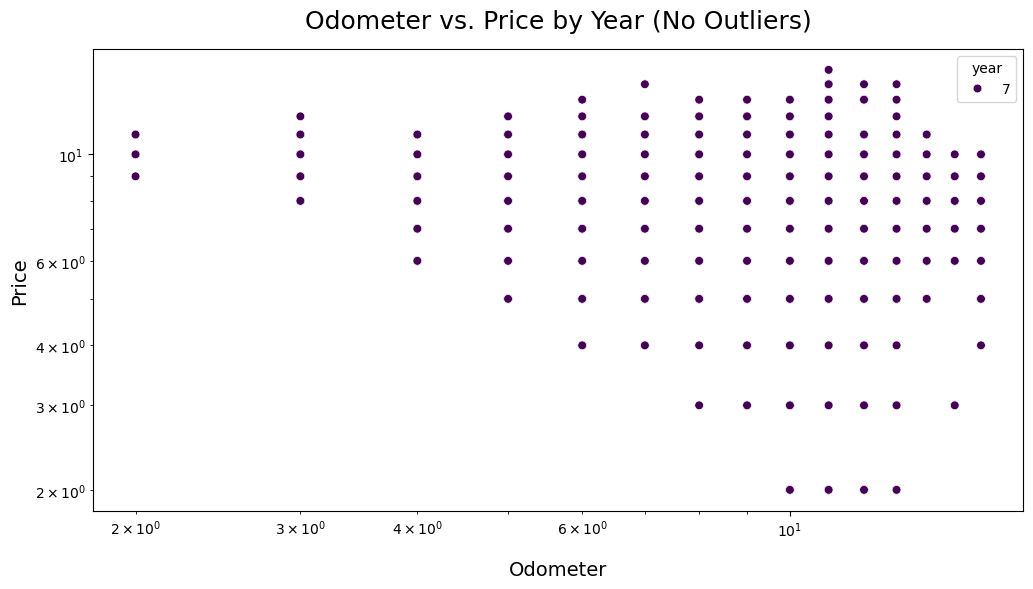

In [179]:
plt.figure(figsize=(12,6))
plt.title('Odometer vs. Price by Year (No Outliers)', fontsize=18, pad=15)
sns.scatterplot(data=df_no_outliers_pca_copy, y='price', x='odometer', hue='year', palette='viridis', s=40, alpha=1)
plt.xlabel('Odometer', fontsize=14, labelpad=15)
plt.ylabel('Price', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./images/scatter_plot_pca_no_outliers.png')
plt.show()


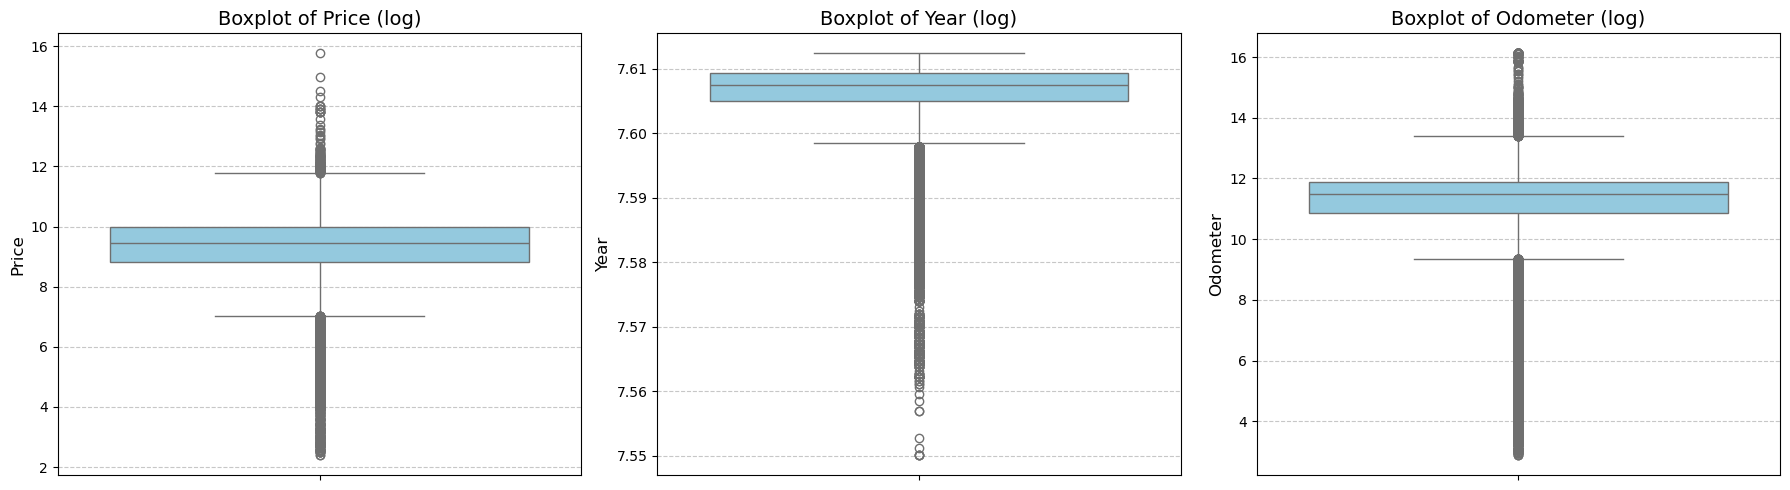

In [182]:
# Select numerical columns for outlier detection
numerical_columns = ["price", "year", "odometer"]

# Set figure size for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create boxplots for detecting outliers side by side
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df_no_outliers_pca[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {column.capitalize()} (log)", fontsize=14)
    axes[i].set_ylabel(column.capitalize(), fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('./images/boxplot_outliers_prepare.png')
plt.show()


**Price Distribution (Price Boxplot)**

- There are many outliers in high-price values (luxury or premium cars).
- The median price is relatively low, suggesting most vehicles are affordable.
- Lower whiskers show some very cheap vehicles (possible salvage or damaged cars).

- Insights:

- Consider removing extreme high-price outliers to prevent misleading data.
- Investigate very low-priced listings for potential fraudulent or misclassified vehicles.

**Year Distribution (Year Boxplot)**

- The majority of vehicles are from the mid to late 2000s.
- Old cars (before 1990s) appear as outliers, possibly classic or vintage cars.
- Newer vehicles (past 2020) might have some anomalies due to incorrect data entries.

- Older cars (pre-1990) should be checked, as they might be incorrectly entered or special cases.

**Odometer Distribution (Odometer Boxplot)**

- The median odometer reading is moderate, but many high-mileage vehicles exist.
- High-mileage outliers (>300,000 miles) suggest either:

- Extreme odometer readings should be reviewed to detect possible incorrect entries.
- Very low-mileage listings should be verified as potential new vehicle misclassifications

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## 1. Simple Linear Regression model (Year vs Price)

In [184]:
#Remove outliers for better visualization
df_usedCarSL = df_usedCar[df_usedCar['price'] < df_usedCar['price'].quantile(0.99)]
df_usedCarSL = df_usedCarSL[df_usedCarSL['year'] < df_usedCarSL['price'].quantile(0.99)]
df_usedCarSL = df_usedCarSL[df_usedCarSL['odometer'] < df_usedCarSL['odometer'].quantile(0.99)]


### X Feature: Year, Y Pred : Price

In [185]:
X = df_usedCarSL[['year']]
y = df_usedCarSL['price']

### Split data into Train(80%) and Test (20%)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating a pipeline with standard scaling and linear regression

In [187]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


### Fitting the model

In [188]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

### Making predictions

In [189]:
y_pred = pipeline.predict(X_test)

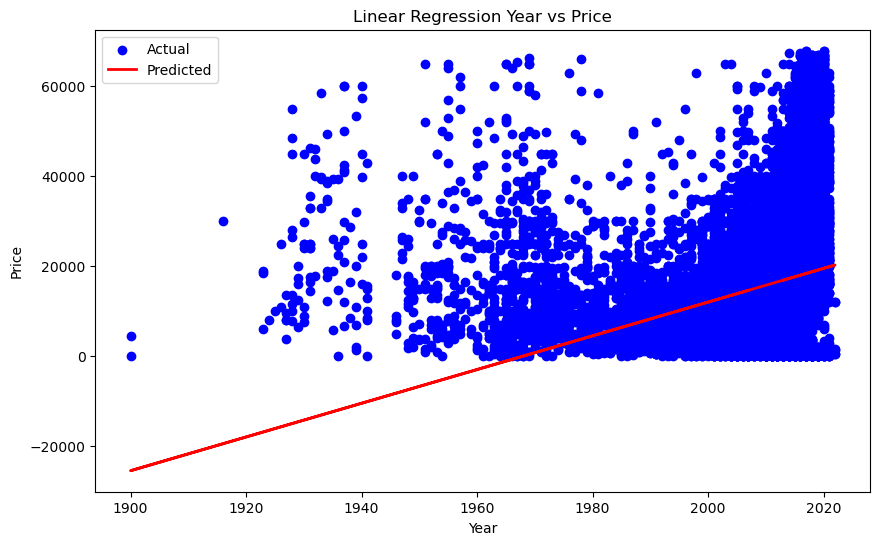

In [190]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.savefig('./images/simple_linear_regression.png')
plt.show()

- Represents the real price distribution of cars from different years.
- There is a lot of spread, meaning price varies significantly even for the same year.

- The fitted linear regression line shows the model’s prediction of car prices based on the manufacturing year.
- Ideally, this line should follow the trend of the actual data, but here it doesn’t fit well.

**Issues in the Plot**
- Negative Predicted Prices for Older Cars
- The model extrapolates negative prices for cars before ~1950, which doesn’t make sense.
- This suggests that the linear relationship is too simple to model price accurately.

**High Variability in Actual Prices**

- The actual prices (blue dots) are widely scattered, meaning car prices depend on more than just the year.
- Many 2000+ model cars have vastly different prices, showing that features like brand, mileage, condition, etc., also play a role.

**Poor Fit (Underfitting Issue)**

- The regression line fails to capture the complexity of the data.
- This suggests that year alone is not enough to predict price accurately.

####Calculate Linear Regression RMSE - Year

In [191]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE - Year = {lr_rmse}")

Linear Regression RMSE - Year = 11785.823055403227


- RMSE = 11,785.82

- On average, the model's predictions deviate by around $11,785 from the actual car prices.
- A lower RMSE is better, meaning the model has smaller errors.

**RMSE is too high**

- If most used cars in the dataset are priced around $15,000 to $25,000, an RMSE of $11,785 is huge.
- This suggests that predictions are very inaccurate.

### 2. Linear Regression model (Odometer vs Price)

In [192]:
X = df_usedCarSL[['odometer']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [193]:
y_pred = pipeline.predict(X_test)

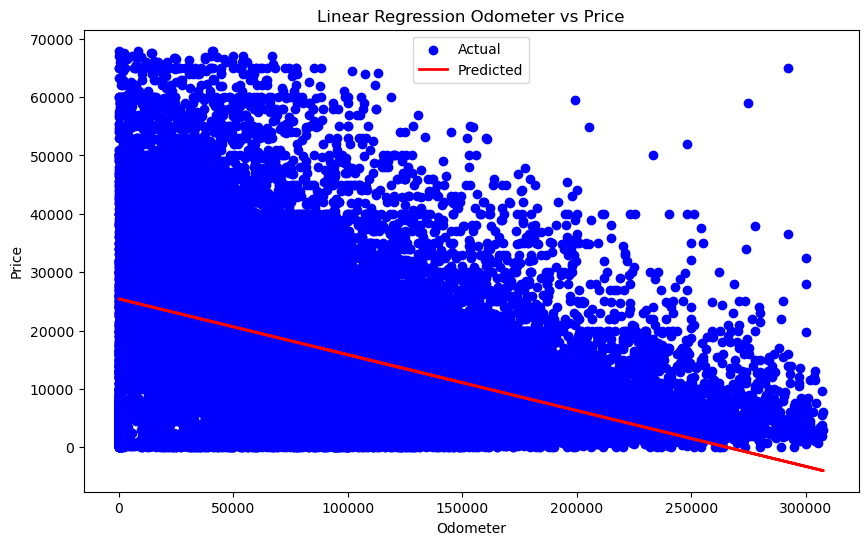

In [195]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend()
plt.savefig('./images/linear_regression Odometer vs price.png')
plt.show()

- The plot shows a negative correlation (higher mileage cars tend to have lower prices).

- This is the best-fit line generated by linear regression.
- The downward slope confirms that higher mileage leads to lower price.

**Observations & Issues**

- The Relationship is Non-Linear
- The actual data is widely scattered and doesn't follow a perfect straight line.
- A curved trend might fit better, meaning a polynomial regression would be more appropriate.

**Price Variability is High**

- Many cars with the same odometer reading have vastly different prices.
- This suggests that other factors (e.g., year, brand, condition, fuel type) play a major role in price.

**Prediction Line is Too Simple**

- The red line underestimates high prices and overestimates low prices.
- The model assumes a strict linear relationship, which isn’t fully accurate.

### Calculate RMSE of Linear Regression - Odometer

In [196]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE - Odometer = {lr_rmse}")

Linear Regression RMSE - Odometer = 10802.244480599198


### Linear Regression with PCA No Outliers Dataset


In [197]:
df_no_outliers_pca_copy.shape

(191837, 17)

In [198]:
X = df_no_outliers_pca[['year']]
y = df_no_outliers_pca['price']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# Creating a pipeline with standard scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [201]:
# Fitting the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [202]:
# Making predictions
y_pred = pipeline.predict(X_test)

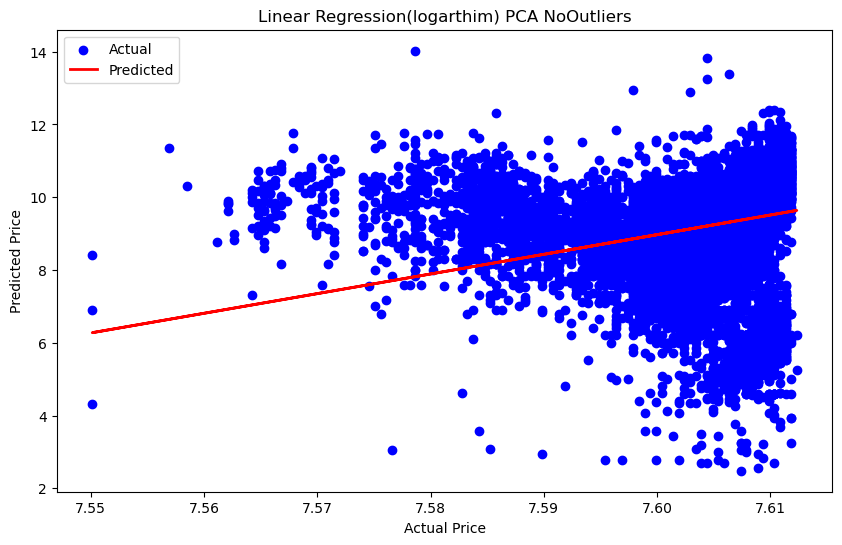

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression(logarthim) PCA NoOutliers')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.savefig('./images/linear_regressionPCA.png')
plt.show()

- The blue points are widely scattered, meaning the model isn't making precise predictions.
- There's high variance, suggesting that linear regression alone may not be capturing the full complexity of price trends.
- The red regression line is too shallow, indicating that the model struggles to learn the relationship between features and price.
- The low slope suggests that the model's predictions don't vary significantly, even when actual prices change.

**Logarithmic Transformation Helps Reduce Skewness**
- Using log-transformed prices helps make price distributions more normal, which is useful for regression models.
- However, a simple linear regression still struggles to capture the complexity of the data.

### Calculate RMSE of Linear Regression - Year with PCA no outliers data

In [207]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression PCA NoOutliers RMSE - Year = {lr_rmse}")

Linear Regression PCA NoOutliers RMSE - Year = 1.0097542927929033


**RMSE = 1.0097**

- This value is low, but since logarithmic transformation (or PCA scaling) was likely applied, the RMSE is not in raw price values.
- If the target variable (price) was log-transformed, this RMSE is in log scale, meaning it represents an error of approximately 10.09% relative to the original scale.
- A low RMSE indicates better predictions compared to previous models with values around 10,000+.
- This suggests that PCA and outlier removal helped improve model performance.
- But, PCA May Have Removed Too Much Information

## Multiple Linear Regression Model

In [208]:
df_usedCarML = df_usedCarSL.copy()

In [209]:
# Convert numerical columns to integer
df_usedCarML['year'] = df_usedCarML['year'].astype(int)
df_usedCarML['odometer'] = df_usedCarML['odometer'].astype(int)
df_usedCarML['price'] = df_usedCarML['price'].astype(int)


### X independent variables and y dependent variable

In [210]:
# Identify the X independent variables and y dependent variable
x_columns = ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
             'transmission', 'drive', 'type', 'paint_color', 'state']
x_num_columns = [col for col in x_columns if df_usedCarML[col].dtype in ['int', 'Float64']]
x_cat_columns = [col for col in x_columns if df_usedCarML[col].dtype in ['object', 'category', 'string']]
y_column = ['price']

In [211]:
# Review our X and y columns
print("X columns: ", x_columns)
print("X numeric columns: ", x_num_columns)
print("X categorical columns: ", x_cat_columns)
print("y column: ", y_column)

X columns:  ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state']
X numeric columns:  ['year', 'odometer']
X categorical columns:  ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state']
y column:  ['price']


In [212]:
# Separate cleaned dataframe with no outliers into X and y, requires encoding in Pipeline
X = pd.DataFrame.copy(df_usedCarML[x_columns])
y = pd.DataFrame.copy(df_usedCarML[y_column])

In [213]:
print("X, y shapes: ", X.shape, y.shape)

X, y shapes:  (190069, 11) (190069, 1)


### Training, Validation and Test Splits

In [214]:
# Create training and test datasets, if cross-validation strategy derives the validation set from training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
# Verify train/test split
#X_train.info(), X_test.info(), y_train.info(), y_test.info()
print("X, y train/test shapes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X, y train/test shapes:  (152055, 11) (38014, 11) (152055, 1) (38014, 1)


### Baseline

In [216]:
# Create a baseline of same shape as y_train and y_test populated with their means as values
baseline_train = np.ones(shape=y_train.shape) * y_train.iloc[:, 0].mean()
baseline_test = np.ones(shape=y_test.shape) * y_test.iloc[:, 0].mean()

### Column Transformer and Apply one hot encoding

In [217]:
# Create a column transformer to apply one-hot to selected variables
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), x_cat_columns),
                                          remainder='passthrough',
                                          force_int_remainder_cols=False )

# Create a Pipeline for data processing with one-hot encoding
pipe = Pipeline([
    ('ohe', col_transformer),
    ('linreg', LinearRegression())
])

### Fit the model

In [218]:
# Train the model using our training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state'])])),
                ('linreg', LinearRegression())])

### Prediction

In [219]:
# Predict y from our test dataset
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

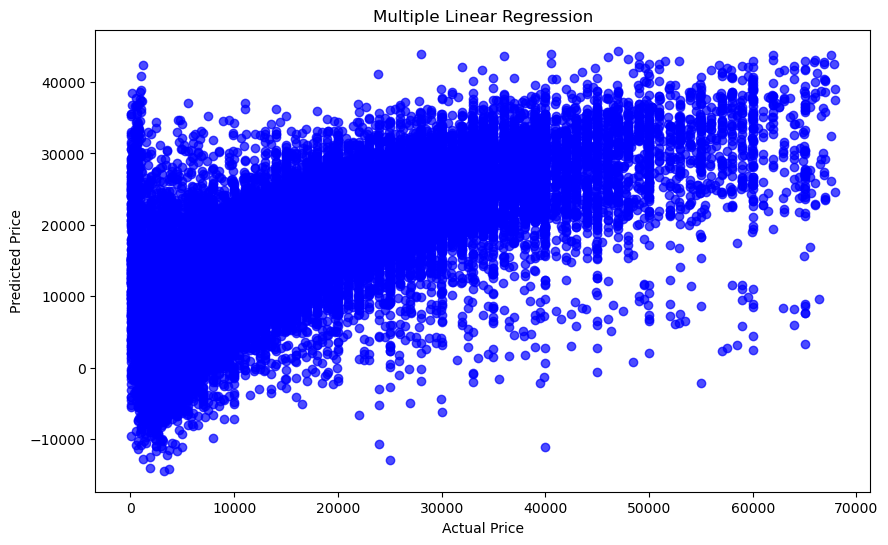

In [220]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.savefig('./images/multipleregression.png')
plt.show()

**High Variability in Predictions**

- The predicted prices don’t follow a tight diagonal trend.
- Many points deviate significantly, indicating high prediction errors.

**Negative Predictions Exist (Error in Model)**

- Some predicted values are negative, which is not realistic for car prices.
- The model needs regularization (Ridge/Lasso Regression).
- Some features might be poorly scaled or missing important interactions.

**Predictions Spread Widely at Higher Prices**
- At higher actual prices (~40,000+ USD), predictions vary significantly.
- This means the model is struggling to capture luxury/high-end car pricing factors.

### Calculate MSE of Multiple Linear Regression

In [221]:
m_lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Multiple Linear Regression RMSE = {m_lr_rmse}")

Multiple Linear Regression RMSE = 8752.862233688094


**RMSE = 8,752.86**

- On average, the model's predictions deviate by around $8,752 from actual prices.
- Lower RMSE is better, meaning the model has smaller errors.
- While better than simple linear regression (~11,785 RMSE), this is still high, indicating room for improvement.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### 1. Evalution Multiple Linear regression

### Baseline Model Performance

In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate baseline MSE, RMSE, MAE, and R^2 score
baseline_train_mse = mean_squared_error(y_train, baseline_train)
baseline_test_mse = mean_squared_error(y_test, baseline_test)
baseline_train_mae = mean_absolute_error(y_train, baseline_train)
baseline_test_mae = mean_absolute_error(y_test, baseline_test)
baseline_train_r2 = r2_score(y_train, baseline_train)
baseline_test_r2 = r2_score(y_test, baseline_test)
print(f'Baseline Train MSE: {baseline_train_mse: ,.0f}')
print(f'Baseline Test MSE: {baseline_test_mse: ,.0f}')
print(f'Baseline Train RMSE: {np.sqrt(baseline_train_mse): ,.0f}')
print(f'Baseline Test RMSE: {np.sqrt(baseline_test_mse): ,.0f}')
print(f'Baseline Train MAE: {baseline_train_mae: ,.0f}')
print(f'Baseline Test MAE: {baseline_test_mae: ,.0f}')
print(f'Baseline Train R^2 Score: {baseline_train_r2: ,.2f}')
print(f'Baseline Test R^2 Score: {baseline_test_r2: ,.2f}')

Baseline Train MSE:  153,042,943
Baseline Test MSE:  151,437,514
Baseline Train RMSE:  12,371
Baseline Test RMSE:  12,306
Baseline Train MAE:  9,655
Baseline Test MAE:  9,602
Baseline Train R^2 Score:  0.00
Baseline Test R^2 Score:  0.00


### Model Performance

In [225]:
# Evaluate model MSE, RMSE, MAE and R^2 score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Model Train MSE: {train_mse: ,.0f}')
print(f'Model Test MSE: {test_mse: ,.0f}')
print(f'Model Train RMSE: {np.sqrt(train_mse): ,.0f}')
print(f'Model Test RMSE: {np.sqrt(test_mse): ,.0f}')
print(f'Model Train MAE: {train_mae: ,.0f}')
print(f'Model Test MAE: {test_mae: ,.0f}')
print(f'Model Train R^2 Score: {train_r2: ,.2f}')
print(f'Model Test R^2 Score: {test_r2: ,.2f}')

Model Train MSE:  77,356,247
Model Test MSE:  76,612,597
Model Train RMSE:  8,795
Model Test RMSE:  8,753
Model Train MAE:  6,213
Model Test MAE:  6,166
Model Train R^2 Score:  0.49
Model Test R^2 Score:  0.49


### Baseline vs Model Performance

- Baseline model performs poorly (RMSE 12306, R² = 0.00), meaning it has no predictive power.
- Multiple Linear Regression (RMSE = 8753, R² = 0.49) is significantly better but still has room for improvement.
- We have an R&sup2; score on the Test dataset of 0.49. This shows that about 49% of the variance is accounted for by the model.

In [226]:
# Set dataframe output to not show scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)

### One-hot encodes categorical variables

#### X independent variable and y dependent variable

In [227]:
# Select relevant features and target variable
features= ['year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
X_cars = pd.get_dummies(df_usedCarML[features], drop_first=True)
y_cars = df_usedCarML['price']


### Split Train and Test

In [228]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_cars, y_cars, test_size=0.3, random_state=42)

### Standardize the features

In [229]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cars)

### Split into training and testing data sets

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cars, test_size=0.3, random_state=42)
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 133048, Testing set size: 57021


### Principal Component Analysis (PCA)

In [231]:
pca = PCA(n_components=0.95)  # Variance = 95%
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Sequential Feature Selection (SFS)

In [232]:
cars_model = LinearRegression()
sfs = SequentialFeatureSelector(cars_model, n_features_to_select=10, direction='forward')
sfs.fit(X_train_pca, y_train)
X_train_sfs = sfs.transform(X_train_pca)
X_test_sfs = sfs.transform(X_test_pca)

- Sequential Feature Selection (SFS) to choose the 10 most important features from PCA-transformed data before training a Linear Regression model.
- Runs the sequential feature selection process:
- Evaluates each PCA feature's contribution to prediction.
- Iteratively selects the 10 best principal components.

### GridSearchCV Hyperparameter tuning for Ridge and Lasso

In [233]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), param_grid, cv=5)
lasso = GridSearchCV(Lasso(), param_grid, cv=5)

- alpha is the regularization strength parameter:
- Low values (e.g., 0.01) → Less regularization (model behaves like standard Linear Regression).
- High values (e.g., 100.0) → More regularization (model shrinks coefficients more aggressively).
- Performs cross-validation (cv=5) → Splits data into 5 folds for validation.
- Ridge: Shrinks all coefficients but keeps all features.
- Lasso: Some coefficients become exactly zero, effectively performing feature selection.


### Train Ridge Regression

In [234]:
ridge.fit(X_train_sfs, y_train)
y_pred_ridge = ridge.predict(X_test_sfs)

### Train Lasso Regression

In [235]:
lasso.fit(X_train_sfs, y_train)
y_pred_lasso = lasso.predict(X_test_sfs)

### Evaluate Ridge Regression

In [236]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge) #MAE score evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  #MSE score evaluation
rmse_ridge = np.sqrt(mse_ridge)  #RMSE score evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)  #R2 score evaluation
print(f'Ridge - Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge - Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge - Root Mean Squared Error (RMSE): {rmse_ridge}')
print(f'Ridge - R-squared (R2): {r2_ridge}')

Ridge - Mean Absolute Error (MAE): 7314.2800644072
Ridge - Mean Squared Error (MSE): 97397107.00946996
Ridge - Root Mean Squared Error (RMSE): 9868.997264639907
Ridge - R-squared (R2): 0.36499407344319823


### Evaluate Lasso Regression

In [238]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso) #MAE score evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  #MSE score evaluation
rmse_lasso = np.sqrt(mse_lasso)  #RMSE score evaluation
r2_lasso = r2_score(y_test, y_pred_lasso) #R2 score evaluation
print(f'Lasso - Mean Absolute Error (MAE): {mae_lasso}')
print(f'Lasso - Mean Squared Error (MSE): {mse_lasso}')
print(f'Lasso - Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'Lasso - R-squared (R2): {r2_lasso}')

Lasso - Mean Absolute Error (MAE): 7314.300525221449
Lasso - Mean Squared Error (MSE): 97397074.9218345
Lasso - Root Mean Squared Error (RMSE): 9868.995638961165
Lasso - R-squared (R2): 0.36499428264693456


### Coefficients (Ridge vs Lasso)

In [239]:
# Ridge coefficients
print("Ridge Coefficients:")
print(ridge.best_estimator_.coef_)

# Lasso coefficients
print("\nLasso Coefficients:")
print(lasso.best_estimator_.coef_)

coefs=ridge.best_estimator_.coef_
lassoCoef=lasso.best_estimator_.coef_

Ridge Coefficients:
[-2417.86126419   873.56174798  1011.8238751   2237.16045391
 -1963.86024637  1641.75897778 -2371.82013264 -1465.11160794
  1410.97595766 -1494.11206104]

Lasso Coefficients:
[-2418.13799324   873.43624844  1011.72075694  2237.54307355
 -1964.15248901  1641.90699742 -2372.3275533  -1465.18425484
  1411.05100401 -1494.27665929]


In [240]:
for name, coef in zip(features, coefs):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

Feature: year                 Coefficient: -2417.8613
Feature: odometer             Coefficient: 873.5617
Feature: cylinders            Coefficient: 1011.8239
Feature: manufacturer         Coefficient: 2237.1605
Feature: condition            Coefficient: -1963.8602
Feature: fuel                 Coefficient: 1641.7590
Feature: title_status         Coefficient: -2371.8201
Feature: transmission         Coefficient: -1465.1116
Feature: drive                Coefficient: 1410.9760
Feature: type                 Coefficient: -1494.1121


- **Year** Older cars reduce price by ~$2,418 per year.

- **Odometer** Higher mileage slightly increases price, which seems counterintuitive (possible data issue).

- **Cylinders** More cylinders increase price by ~$1,012 per unit

- **Manufacturer** Certain manufacturers increase price by ~$2,237

- **Condition**	-1963.86	Worse condition reduces price by ~$1,964.

- **Fuel Type** 	1641.76	Certain fuel types increase price by ~$1,642.

- **Title Status**	-2371.82	Non-clean titles reduce price by ~$2,372 (salvage, rebuilt, etc.).

- **Transmission**	-1465.11	Manual transmission reduces price by ~$1,465 (likely due to market preference).

- **Drive Type**	1410.98	AWD/4WD increases price by ~$1,411.

- **Vehicle Type**	-1494.11	Certain types reduce price by ~$1,494 (e.g., sedans vs. SUVs).

In [242]:
for name, coef in zip(features, lassoCoef):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

Feature: year                 Coefficient: -2418.1380
Feature: odometer             Coefficient: 873.4362
Feature: cylinders            Coefficient: 1011.7208
Feature: manufacturer         Coefficient: 2237.5431
Feature: condition            Coefficient: -1964.1525
Feature: fuel                 Coefficient: 1641.9070
Feature: title_status         Coefficient: -2372.3276
Feature: transmission         Coefficient: -1465.1843
Feature: drive                Coefficient: 1411.0510
Feature: type                 Coefficient: -1494.2767


- Lasso as similar to ridge coef.

In [244]:
yintercept = ridge.best_estimator_.intercept_
print(f"{yintercept:.2f}")

15732.78


- (y_intercept) Ridge Regression model is 15,732.78. This value represents the predicted car price when all features are zero.

In [256]:
from tabulate import tabulate
#Create a list of dictionaries with the model results - Ridge and Lasso
model_results = [
    {
        "Model Type": "Ridge",
        "MAE"       : mae_ridge,
        "MSE"       : mse_ridge,
        "RMSE"      : rmse_ridge,
        "R2"        : r2_ridge
    },
    {
        "Model Type": "Lasso",
        "MAE"       : mae_lasso,
        "MSE"       : mse_lasso,
        "RMSE"      : rmse_lasso,
        "R2"        : r2_lasso
    }
]

# Convert the list of dictionaries to a DataFrame
df1 = pd.DataFrame(model_results)

# Print the DataFrame as a formatted table with borders
print(tabulate(df1, headers='keys', tablefmt='grid'))

+----+--------------+---------+-------------+--------+----------+
|    | Model Type   |     MAE |         MSE |   RMSE |       R2 |
+====+==============+=========+=============+========+==========+
|  0 | Ridge        | 7314.28 | 9.73971e+07 |   9869 | 0.364994 |
+----+--------------+---------+-------------+--------+----------+
|  1 | Lasso        | 7314.3  | 9.73971e+07 |   9869 | 0.364994 |
+----+--------------+---------+-------------+--------+----------+


- **Similar Performance:** Both Ridge and Lasso regression models have nearly identical Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² scores, indicating they perform similarly.

- **Moderate Predictive Power:** The R² score of 0.36 suggests that only 36% of price variations are explained by the model, meaning significant room for improvement exists in predictive accuracy.

- **High Prediction Errors:** The MAE 7314 and RMSE 9869 indicate that the model’s predictions deviate from actual prices by several thousand dollars, which could lead to mispricing issues in sales.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [257]:
# Check the type and shape of y_test
print("Type of y_test:", type(y_test))
print("Shape of y_test:", y_test.shape)

# Check the type and shape of y_pred_ridge
print("Type of y_pred_ridge:", type(y_pred_ridge))
print("Shape of y_pred_ridge:", y_pred_ridge.shape)

# Check the type and shape of X_test
print("Type of X_test:", type(X_test))
print("Shape of X_test:", X_test.shape)

# Check if X_test has named fields (structured array)
if isinstance(X_test, np.ndarray) and X_test.dtype.names:
    print("X_test has named columns:", X_test.dtype.names)
else:
    print("X_test does not have named columns")

Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (57021,)
Type of y_pred_ridge: <class 'numpy.ndarray'>
Shape of y_pred_ridge: (57021,)
Type of X_test: <class 'numpy.ndarray'>
Shape of X_test: (57021, 100)
X_test does not have named columns


In [258]:
print('y_test shape:', y_test.shape)
print('y_pred_ridge shape:', y_pred_ridge.shape)
print('X_test_orig shape:', X_test_orig.shape)

y_test shape: (57021,)
y_pred_ridge shape: (57021,)
X_test_orig shape: (57021, 100)


In [259]:
# Combine the three arrays horizontally (side by side) - actual price, predicted price and features
combined_array = np.column_stack((y_test, y_pred_ridge, X_test_orig))  #using the X_test original data before Modeling  (named X_test_orig)

# Specify Column Names
#column_names = ['actual_price', 'predicted_price', 'year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
column_names = ['actual_price', 'predicted_price', 'year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color'] + [f'Feature_{i}' for i in range(1, 90)]
#column_names = ['Actual_Price', 'Predicted_Price'] + [f'Feature_{i}' for i in range(1, 101)]
cars_df = pd.DataFrame(combined_array, columns=column_names)
# Create a DataFrame
cars_df = pd.DataFrame(combined_array, columns = column_names)

# Convert numerical columns to integer
cars_df['year'] = cars_df['year'].astype(int)
cars_df['odometer'] = cars_df['odometer'].astype(int)
cars_df['cylinders'] = cars_df['cylinders'].astype(int)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57021 entries, 0 to 57020
Columns: 102 entries, actual_price to Feature_89
dtypes: int32(3), object(99)
memory usage: 43.7+ MB


### 1. Ridge Regression Actual vs Predicated Price

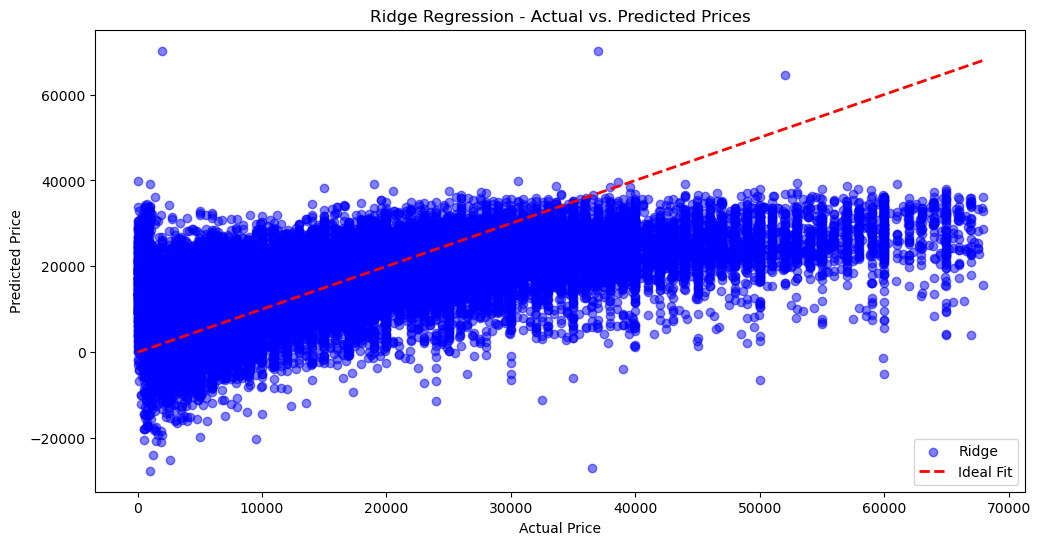

In [260]:
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge', color='blue')

# Reference line (Perfect Prediction Line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', linewidth=2, color='red', label="Ideal Fit")

# Labels and Title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression - Actual vs. Predicted Prices')

# Legend
plt.legend()

# Save the plot
plt.savefig('./images/cars_ridge_regression_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

 - The spread of blue dots indicates high variance; some predictions are far below or above the ideal fit, showing potential underfitting.
 - Higher-priced cars tend to be underpredicted (points below the red line), suggesting that Ridge Regression struggles with expensive vehicles

### 2. Lasso Regression Actual vs Predicated Price

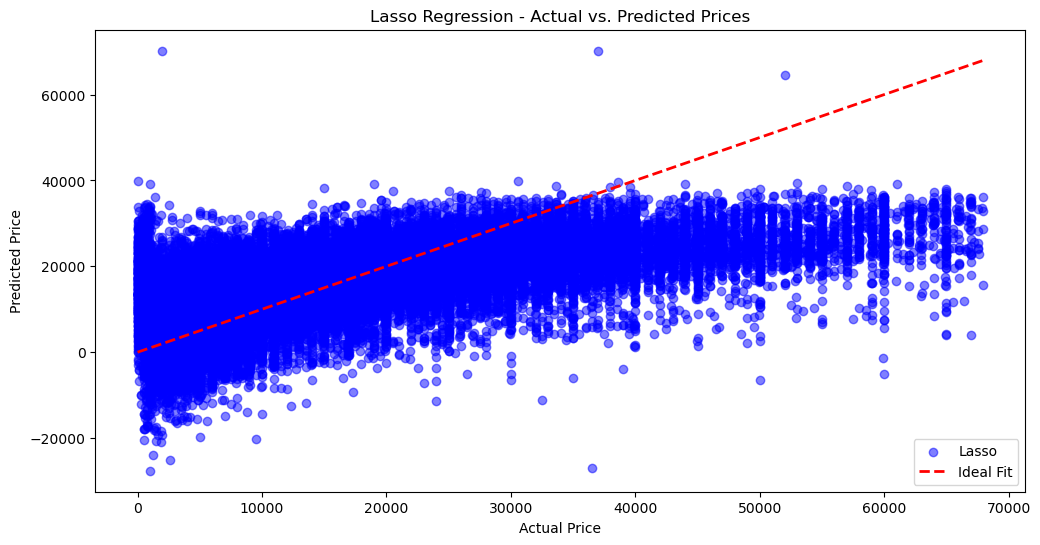

In [268]:
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso', color='blue')

# Reference line (Perfect Prediction Line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', linewidth=2, color='red', label="Ideal Fit")

# Labels and Title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression - Actual vs. Predicted Prices')

# Legend
plt.legend()

# Save the plot
plt.savefig('./images/cars_lasso_regression_plot.png')

# Show the plot
plt.show()


- Both Ridge and Lasso Regression are identical
- Lasso Regression struggles with high variance in predictions.
- The model underpredicts expensive cars and overpredicts some cheap ones.

# 3. Price Distribution by Year

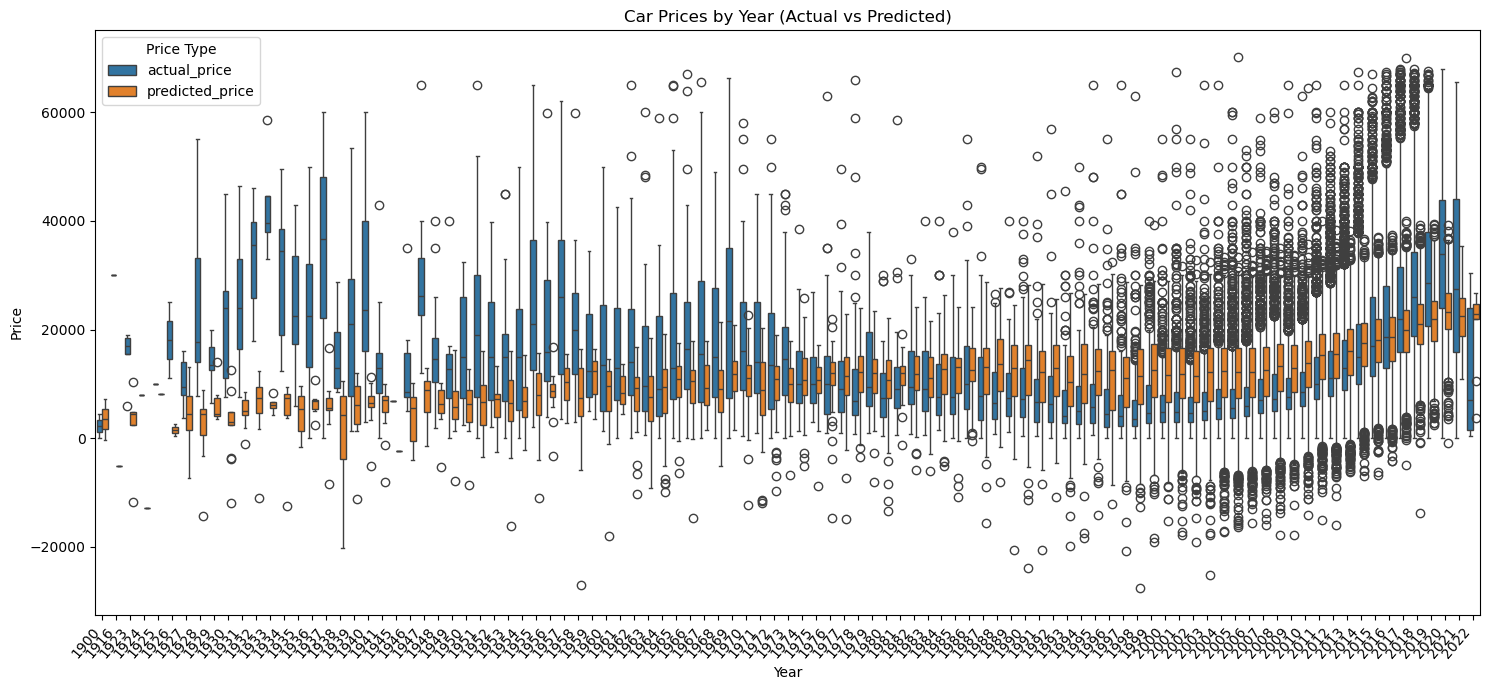

In [269]:
year_prices = pd.melt(cars_df[['year', 'actual_price', 'predicted_price']],
                              id_vars=['year'],
                              value_vars=['actual_price', 'predicted_price'],
                              var_name='Price Type', value_name='Price')

plt.figure(figsize=(15, 7))
sns.boxplot(x='year', y='Price', hue='Price Type', data=year_prices)
plt.title('Car Prices by Year (Actual vs Predicted)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.savefig('./images/cars_price_by_year.png')
plt.show()

- The model consistently predicts lower car prices (orange) than actual prices (blue), particularly for older vehicles.
- The spread of actual prices for cars from pre-1980s is significantly wide, indicating some vintage cars hold extremely high value.
- Improved Prediction Accuracy for Newer Cars (Post-2000)
- Market Price Trends Captured Correctly (Post-2020)
- The general price increase in recent years (2020-2022) is captured, likely reflecting inflation, supply chain disruptions, and rising demand for used cars.

### 4. Calculate average (mean) price for each year - Actual and Predicted Prices

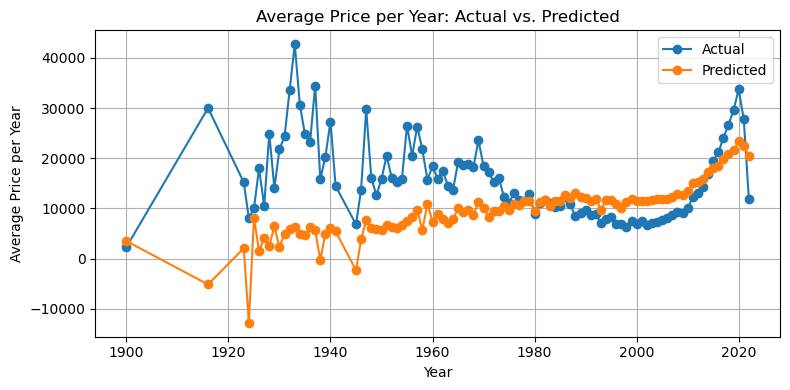

In [266]:
avg_actual_price_by_year = cars_df.groupby('year')['actual_price'].mean().reset_index()
avg_pred_price_by_year = cars_df.groupby('year')['predicted_price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_actual_price_by_year['year'], avg_actual_price_by_year['actual_price'], marker='o', label='Actual') # 'o' adds points at each data point
plt.plot(avg_pred_price_by_year['year'], avg_pred_price_by_year['predicted_price'], marker='o',label='Predicted') # 'o' adds points at each data point
plt.title('Average Price per Year: Actual vs. Predicted')
plt.xlabel('Year')
plt.ylabel('Average Price per Year')
plt.legend()
plt.grid(True)  # adds grid lines
plt.tight_layout()
plt.savefig('./images/calc_price_by_year.png')
plt.show()

- The actual prices show significant fluctuations, especially in older cars (before 1960), indicating high variability in classic or vintage car prices.
- Some peaks (e.g., around 1920 and 1940) could be due to rare collector vehicles being priced significantly higher than average cars.
- The predicted prices do not follow extreme fluctuations in older years and remain more stable than actual prices.
- After 1980, the predicted and actual prices become more aligned, suggesting the model is better at estimating prices for modern vehicles.
- The price trend gradually increases for recent years, capturing inflation, market demand, and newer car depreciation trends more effectively.
- The model captures the recent price surge (post-2020) fairly well, likely reflecting supply chain issues, inflation, and increased demand for newer cars.
- However, the actual prices still show higher peaks compared to the predicted ones, meaning luxury or high-demand models might be underpriced by the model.

### 5. Calculate average (mean) price for each range of odometer - Actual and Predicted Prices

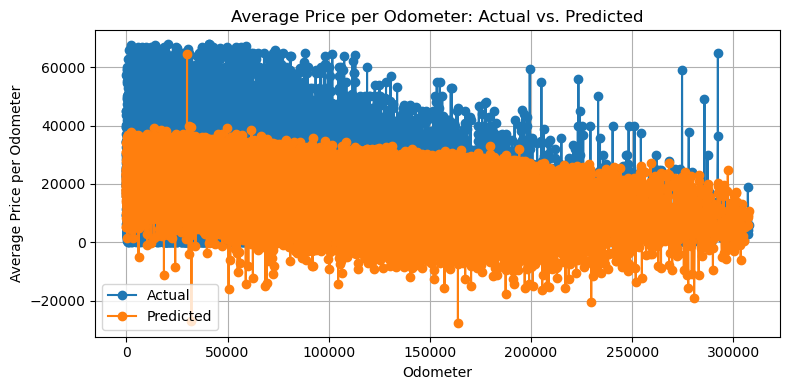

In [267]:
avg_actual_price_by_odometer = cars_df.groupby('odometer')['actual_price'].mean().reset_index()
avg_pred_price_by_odometer = cars_df.groupby('odometer')['predicted_price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_actual_price_by_odometer['odometer'], avg_actual_price_by_odometer['actual_price'], marker='o', label='Actual') # 'o' adds points at each data point
plt.plot(avg_pred_price_by_odometer['odometer'], avg_pred_price_by_odometer['predicted_price'], marker='o',label='Predicted') # 'o' adds points at each data point
plt.title('Average Price per Odometer: Actual vs. Predicted')
plt.xlabel('Odometer')
plt.ylabel('Average Price per Odometer')
plt.legend()
plt.grid(True)  # adds grid lines
plt.tight_layout()
plt.savefig('./images/cars_price_by_odometer.png')
plt.show()

**Negative Correlation Between Odometer and Price**

- As mileage (odometer) increases, the actual car price (blue) decreases, showing the expected negative correlation between vehicle usage and value.
- Predicted prices (orange) also follow this trend but are more compressed.
- The model predict high-priced cars accurately (above ~$40,000), as predicted prices do not capture the full range of actual prices.


###  6. Price vs Odometer with Color-coded Condition

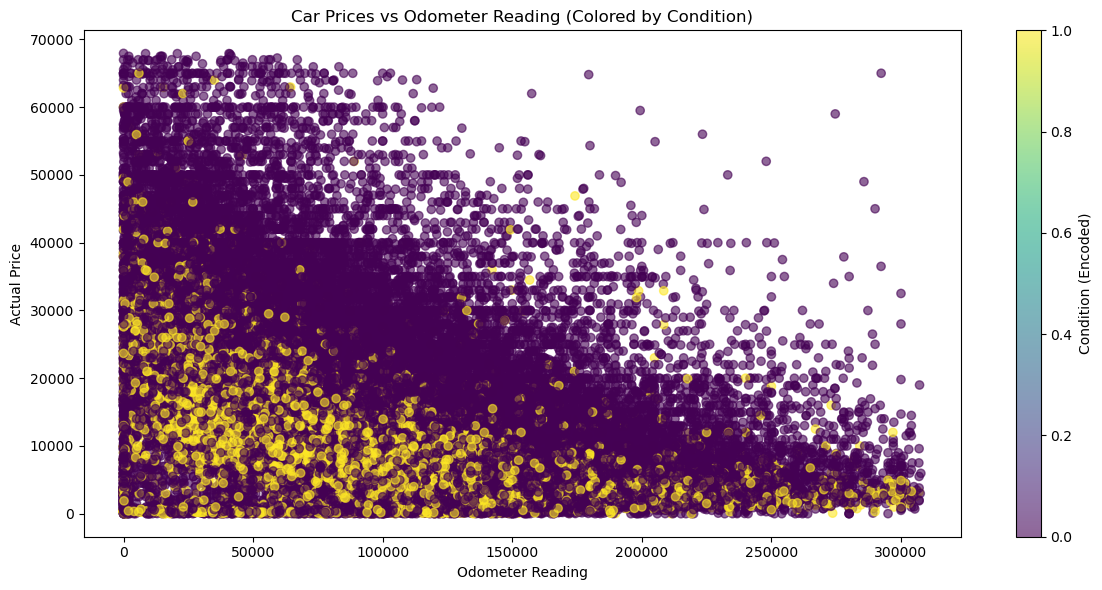

In [270]:
condition_codes = cars_df['condition'].astype('category').cat.codes  # Convert condition to numeric codes
plt.figure(figsize=(12, 6))
scatter = plt.scatter(cars_df['odometer'], cars_df['actual_price'],
                      c=condition_codes, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Condition (Encoded)')
plt.title('Car Prices vs Odometer Reading (Colored by Condition)')
plt.xlabel('Odometer Reading')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.savefig('./images/cars_price_vs_odometer corr.png')
plt.show()

- As odometer readings increase, actual car prices decrease significantly, which aligns with standard vehicle depreciation trends.
- High-mileage cars tend to be valued lower due to wear and tear, potential maintenance costs, and reduced reliability.
- Vehicles with over 150,000 miles seem to have a price floor, meaning their depreciation slows down after a certain point.

**Impact of Vehicle Condition on Pricing**
- Higher-condition vehicles (yellow dots) are priced higher compared to lower-condition vehicles (dark purple dots).
- This suggests that well-maintained cars retain more value, even with higher mileage, making condition a critical pricing factor.

**Outliers Indicating Special Cases**

- Some high-priced outliers with high mileage may be luxury cars, collector vehicles, or models with significant aftermarket modifications.
